<a href="https://colab.research.google.com/github/syedshahlal/NLP/blob/main/PewResearch_NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install flask_cors

In [2]:
from flask import Flask, render_template, request,jsonify
from flask_cors import CORS, cross_origin
import requests
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen as uReq

In [3]:
url = "https://www.pewresearch.org/"

In [4]:
uClient = uReq(url)

In [5]:
uClient

In [6]:
homePage = uClient.read()

In [7]:
uClient.close()

In [8]:
html = bs(homePage, "html.parser")


In [9]:
html

<!DOCTYPE html>

<html lang="en-US">
<head>
<meta charset="utf-8"/><script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"40e18f227a",applicationID:"128711286"};;/*! For license information please see nr-loader-rum-1.250.0.min.js.LICENSE.txt */
(()=>{var e,t,r={234:(e,t,r)=>{"use strict";r.d(t,{P_:()=>v,Mt:()=>b,C5:()=>s,DL:()=>A,OP:()=>S,lF:()=>T,Yu:()=>x,Dg:()=>m,CX:()=>c,GE:()=>_,sU:()=>R});var n=r(8632),i=r(9567);const a={beacon:n.ce.beacon,errorBeacon:n.ce.errorBeacon,licenseKey:void 0,applicationID:void 0,sa:void 0,queueTime:void 0,applicationTime:void 0,ttGuid:void 0,user:void 0,account:void 0,product:void 0,extra:void 0,jsAttributes:{},userAttributes:void 0,atts:void 0,transactionName:void 0,tNamePlain:void 0},o={};function s(e){if(!e)throw new Error("All info objects require an agent identifier!");if(!o[e])throw new Error("Info for ".concat(e," was never set"));return o[e]}func

In [10]:
publication_links = html.findAll("div",{"class":"ui link relaxed list"})

In [11]:
len(publication_links)

9

In [12]:
for i in publication_links:
  print(i)

<div class="ui link relaxed list"><a class="item" href="https://www.pewresearch.org/topic/politics-policy/">Politics &amp; Policy</a><a class="item" href="https://www.pewresearch.org/topic/international-affairs/">International Affairs</a><a class="item" href="https://www.pewresearch.org/topic/immigration-migration/">Immigration &amp; Migration</a><a class="item" href="https://www.pewresearch.org/topic/race-ethnicity/">Race &amp; Ethnicity</a><a class="item" href="https://www.pewresearch.org/topic/religion/">Religion</a><a class="item" href="https://www.pewresearch.org/topic/generations-age/">Age &amp; Generations</a><a class="item" href="https://www.pewresearch.org/topic/gender-lgbtq/">Gender &amp; LGBTQ</a></div>
<div class="ui link relaxed list"><a class="item" href="https://www.pewresearch.org/topic/family-relationships/">Family &amp; Relationships</a><a class="item" href="https://www.pewresearch.org/topic/economy-work/">Economy &amp; Work</a><a class="item" href="https://www.pewres

In [13]:
publications_html = publication_links[0:3]

In [14]:
publications_html

[<div class="ui link relaxed list"><a class="item" href="https://www.pewresearch.org/topic/politics-policy/">Politics &amp; Policy</a><a class="item" href="https://www.pewresearch.org/topic/international-affairs/">International Affairs</a><a class="item" href="https://www.pewresearch.org/topic/immigration-migration/">Immigration &amp; Migration</a><a class="item" href="https://www.pewresearch.org/topic/race-ethnicity/">Race &amp; Ethnicity</a><a class="item" href="https://www.pewresearch.org/topic/religion/">Religion</a><a class="item" href="https://www.pewresearch.org/topic/generations-age/">Age &amp; Generations</a><a class="item" href="https://www.pewresearch.org/topic/gender-lgbtq/">Gender &amp; LGBTQ</a></div>,
 <div class="ui link relaxed list"><a class="item" href="https://www.pewresearch.org/topic/family-relationships/">Family &amp; Relationships</a><a class="item" href="https://www.pewresearch.org/topic/economy-work/">Economy &amp; Work</a><a class="item" href="https://www.pew

In [15]:
publications_html = [str(element) for element in publications_html]

In [16]:
publications_html

['<div class="ui link relaxed list"><a class="item" href="https://www.pewresearch.org/topic/politics-policy/">Politics &amp; Policy</a><a class="item" href="https://www.pewresearch.org/topic/international-affairs/">International Affairs</a><a class="item" href="https://www.pewresearch.org/topic/immigration-migration/">Immigration &amp; Migration</a><a class="item" href="https://www.pewresearch.org/topic/race-ethnicity/">Race &amp; Ethnicity</a><a class="item" href="https://www.pewresearch.org/topic/religion/">Religion</a><a class="item" href="https://www.pewresearch.org/topic/generations-age/">Age &amp; Generations</a><a class="item" href="https://www.pewresearch.org/topic/gender-lgbtq/">Gender &amp; LGBTQ</a></div>',
 '<div class="ui link relaxed list"><a class="item" href="https://www.pewresearch.org/topic/family-relationships/">Family &amp; Relationships</a><a class="item" href="https://www.pewresearch.org/topic/economy-work/">Economy &amp; Work</a><a class="item" href="https://www.

In [17]:
href_final = []
for html_snippet in publications_html:
    soup = bs(html_snippet, 'html.parser')
    link_tags = soup.find_all('a')
    href_list = [tag.get('href') for tag in link_tags]

    for href in href_list:
        href_final.append(href)

In [18]:
del href_final[13]

In [19]:
titles = []

for i, url in enumerate(href_final):
    try:
        uClient = uReq(url)
        publication = uClient.read()
        uClient.close()

        # Extract titles
        articles_published = bs(publication, "html.parser")
        pageTitle = articles_published.find("h1", {"class": "ui huge header"})
        pg_title = pageTitle.text.strip()
        titles.append(pg_title)

    except Exception as e:
        print(f"Error while processing title for URL {i + 1}: {url}")
        print(e)

In [20]:
print(titles)

['Politics & Policy', 'International Affairs', 'Immigration & Migration', 'Race & Ethnicity', 'Religion', 'Age & Generations', 'Gender & LGBTQ', 'Family & Relationships', 'Economy & Work', 'Science', 'Internet & Technology', 'News Habits & Media', 'Methodological Research', 'Asia & the Pacific', 'Europe & Russia', 'Latin America', 'Middle East & North Africa', 'North AmericaThis page lists publications that include data on Canada or the Caribbean. For publications that include data on Mexico, please see Latin America.\xa0 This page does not list publications that focus exclusively on the U.S.', 'Sub-Saharan Africa', 'Multiple Regions / Worldwide']


In [21]:
href_final

['https://www.pewresearch.org/topic/politics-policy/',
 'https://www.pewresearch.org/topic/international-affairs/',
 'https://www.pewresearch.org/topic/immigration-migration/',
 'https://www.pewresearch.org/topic/race-ethnicity/',
 'https://www.pewresearch.org/topic/religion/',
 'https://www.pewresearch.org/topic/generations-age/',
 'https://www.pewresearch.org/topic/gender-lgbtq/',
 'https://www.pewresearch.org/topic/family-relationships/',
 'https://www.pewresearch.org/topic/economy-work/',
 'https://www.pewresearch.org/topic/science/',
 'https://www.pewresearch.org/topic/internet-technology/',
 'https://www.pewresearch.org/topic/news-habits-media/',
 'https://www.pewresearch.org/topic/methodological-research/',
 'https://www.pewresearch.org/regions-countries/asia-pacific/',
 'https://www.pewresearch.org/regions-countries/europe-russia/',
 'https://www.pewresearch.org/regions-countries/latin-america/',
 'https://www.pewresearch.org/regions-countries/middle-east-north-africa/',
 'http

In [22]:
dates = []
h2_texts = []
p_texts = []

for i, url in enumerate(href_final):
    try:
        pageUrl = url

        while pageUrl:
            uClient = uReq(pageUrl)
            publication = uClient.read()
            uClient.close()

            # Extract contents
            article_contents = bs(publication, "html.parser")
            article_sections = article_contents.find_all("article", {"class": "story item left aligned wp-block-prc-block-story-item"})

            for article_section in article_sections:
                soup = bs(str(article_section), 'html.parser')

                # Initialize with default values
                date = h2_text = p_text = ''

                # Extract and update if elements exist
                date_elem = soup.find('span', class_='date')
                if date_elem is not None:
                    date = date_elem.text.strip()

                h2_elem = soup.find('h2', class_='header medium')
                if h2_elem is not None:
                    h2_text = h2_elem.text.strip()

                p_elem = soup.find('div', class_='description')
                if p_elem is not None and p_elem.find('p') is not None:
                    p_text = p_elem.find('p').text.strip()

                # Append to respective lists
                dates.append(date)
                h2_texts.append(h2_text)
                p_texts.append(p_text)



           # Check if there is a next page
            next_page_link = article_contents.find("div", {"class": "ui pagination menu"})
            if next_page_link:
                next_page_url = next_page_link.find("a", {"class": "active item"}).find_next("a")
                pageUrl = next_page_url.get("href") if next_page_url else None
            else:
                pageUrl = None

    except Exception as e:
        print(f"Error while processing URL {i + 1}: {url}")
        print(e)


In [23]:
len(h2_texts)

11190

In [24]:
len(p_texts)

11190

In [25]:
p_texts

['67% of people in Taiwan see themselves as primarily Taiwanese, compared with 3% who think of themselves as primarily Chinese.',
 'An estimated 36.2 million Hispanics are eligible to vote this year, up from 32.3 million in 2020.',
 'The number of Black eligible voters in the United States is projected to reach 34.4 million in November 2024 after several years of modest growth.',
 'Asian Americans have been the fastest-growing group of eligible voters in the United States over roughly the past two decades and since 2020.',
 'Untethered from partisan politics and uninterested in keeping up with political news, here is how some Americans view the current state of U.S. politics.',
 'More Black Americans say health outcomes for Black people in the United States have improved over the past 20 years than say outcomes have worsened.',
 'Donald Trump has a wide lead for the Republican Party’s presidential nomination. His supporters stand out from Republicans who back Ron DeSantis or Nikki Hale

In [26]:
contents = []
for i in range(len(h2_texts)):
    content = " ".join([dates[i], h2_texts[i], p_texts[i]])
    contents.append(content)


In [27]:
contents

['Jan 16, 2024 Most people in Taiwan see themselves as primarily Taiwanese; few say they’re primarily Chinese 67% of people in Taiwan see themselves as primarily Taiwanese, compared with 3% who think of themselves as primarily Chinese.',
 'Jan 10, 2024 Key facts about Hispanic eligible voters in 2024 An estimated 36.2 million Hispanics are eligible to vote this year, up from 32.3 million in 2020.',
 'Jan 10, 2024 Key facts about Black eligible voters in 2024 The number of Black eligible voters in the United States is projected to reach 34.4 million in November 2024 after several years of modest growth.',
 'Jan 10, 2024 Key facts about Asian American eligible voters in 2024 Asian Americans have been the fastest-growing group of eligible voters in the United States over roughly the past two decades and since 2020.',
 'Jan 9, 2024 Tuning Out: Americans on the Edge of Politics Untethered from partisan politics and uninterested in keeping up with political news, here is how some Americans v

In [28]:
pip install --upgrade spacy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.6.1
    Uninstalling spacy-3.6.1:
      Successfully uninstalled spacy-3.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.6.0 requires spacy<3.7.0,>=3.6.0, but you have spacy 3.7.2 which is incompatible.


/usr/local/lib/python3.10/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.6.0) was trained with spaCy v3.6.0 and may not be 100% compatible with the current version (3.7.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


Most common political entities:
[('U.S.', 4624), ('Americans', 3752), ('China', 641), ('Republicans', 581), ('the United States', 571), ('Pew Research Center', 535), ('Trump', 530), ('Democrats', 520), ('American', 397), ('COVID-19', 386)]


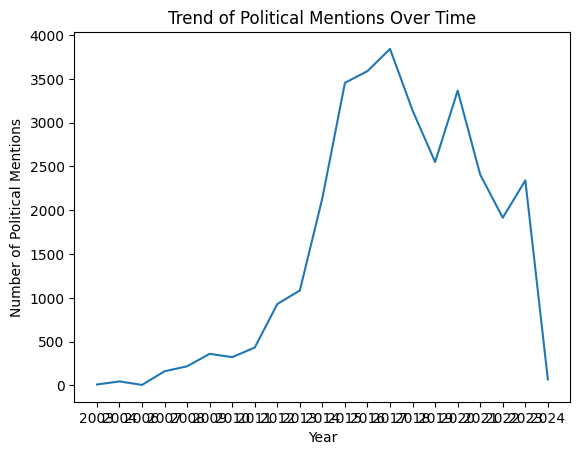

In [29]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Load spaCy model
nlp = spacy.load('en_core_web_sm')



# Extract entities and count occurrences
political_entities = Counter()
for article in contents:
    doc = nlp(article)
    for ent in doc.ents:
        if ent.label_ in ['PERSON', 'NORP', 'ORG', 'GPE']:
            political_entities[ent.text] += 1

# Display the most common entities
print("Most common political entities:")
print(political_entities.most_common(10))

# Trend Analysis (Example: Counting occurrences by year)
trends = Counter()
for article in contents:
    year = article.split()[2]  # Assuming the year is the first word
    doc = nlp(article)
    for ent in doc.ents:
        if ent.label_ in ['PERSON', 'NORP', 'ORG', 'GPE']:
            trends[year] += 1

# Plotting the trends
years = sorted(trends.keys())
counts = [trends[year] for year in years]

plt.plot(years, counts)
plt.xlabel('Year')
plt.ylabel('Number of Political Mentions')
plt.title('Trend of Political Mentions Over Time')
plt.show()


In [30]:
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Sample headlines
headlines = h2_texts

# Keywords for each category
category_keywords = {
    "Politics & Policy": ["government", "legislation", "election", "policy", "politics", "senate", "congress", "parliament"],
    "International Affairs": ["international", "global", "foreign", "diplomacy", "UN", "NATO"],
    "Immigration & Migration": ["immigration", "migrant", "asylum", "refugee", "border"],
    "Race & Ethnicity": ["race", "ethnicity", "racial", "ethnic", "diversity", "minority"],
    "Religion": ["religion", "religious", "Christianity", "Islam", "Hinduism", "Buddhism", "faith"],
    "Age & Generations": ["youth", "elderly", "teen", "senior", "generation", "millennial", "baby boomer"],
    "Gender & LGBTQ": ["gender", "LGBTQ", "feminism", "gay", "lesbian", "transgender", "bisexual"],
    "Family & Relationships": ["family", "marriage", "relationship", "parent", "child", "divorce"],
    "Economy & Work": ["economy", "business", "work", "employment", "finance", "market", "trade"],
    "Science": ["science", "research", "experiment", "innovation", "technology"],
    "Internet & Technology": ["internet", "technology", "online", "digital", "AI", "cyber", "software"],
    "News Habits & Media": ["news", "media", "journalism", "press", "broadcast", "reporting"],
    "Methodological Research": ["research", "study", "survey", "data", "analysis"],
    "Asia & the Pacific": ["Asia", "Pacific", "China", "Japan", "Korea", "India"],
    "Europe & Russia": ["Europe", "Russia", "EU", "NATO", "Germany", "France", "UK"],
    "Latin America": ["Latin America", "Brazil", "Mexico", "Argentina", "Cuba"],
    "Middle East & North Africa": ["Middle East", "North Africa", "Egypt", "Saudi Arabia", "Iran", "Israel", "Syria"],
    "North America": ["North America", "USA", "Canada", "Mexico", "American", "Canadian"],
    "Sub-Saharan Africa": ["Sub-Saharan Africa", "Nigeria", "Kenya", "South Africa", "Ethiopia"],
    "Multiple Regions / Worldwide": ["global", "international", "worldwide", "cross-region", "multi-region"]
}


# Function to categorize a headline
def categorize_headline(headline):
    doc = nlp(headline)
    for category, keywords in category_keywords.items():
        if any(word.lower() in [token.text.lower() for token in doc] for word in keywords):
            return category
    return "Uncategorized"

# Categorize each headline
categorized_headlines = [(headline, categorize_headline(headline)) for headline in headlines]

# Print or process categorized headlines
for headline, category in categorized_headlines:
    print(f"{headline}: {category}")


Streaming output truncated to the last 5000 lines.
Biden Starts Year Two With Diminished Public Support and a Daunting List of Challenges: Uncategorized
As inflation soars, a look at what’s inside the consumer price index: Uncategorized
One-in-Ten Black People Living in the U.S. Are Immigrants: Uncategorized
A growing share of Americans say affordable housing is a major problem where they live: Uncategorized
Some gender disparities widened in the U.S. workforce during the pandemic: Gender & LGBTQ
Share of those 65 and older who are tech users has grown in the past decade: Uncategorized
Trust in America: How do Americans view economic inequality?: Uncategorized
Many U.S. workers are seeing bigger paychecks in pandemic era, but gains aren’t spread evenly: Uncategorized
In 2020, fewer Americans moved, exodus from cities slowed: Uncategorized
Americans Are Less Likely Than Before COVID-19 To Want To Live in Cities, More Likely To Prefer Suburbs: Uncategorized
Racial and ethnic differences 

In [31]:
pip install python-dateutil

In [32]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from dateutil.parser import parse

years = [str(parse(date).year) for date in dates]
combined_texts = [year + " " + h2 + " " + p for year, h2, p in zip(years, h2_texts, p_texts)]




nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

cleaned_texts = [" ".join([word for word in word_tokenize(text) if word.lower() not in stop_words]) for text in combined_texts]

# Vectorization using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(cleaned_texts)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


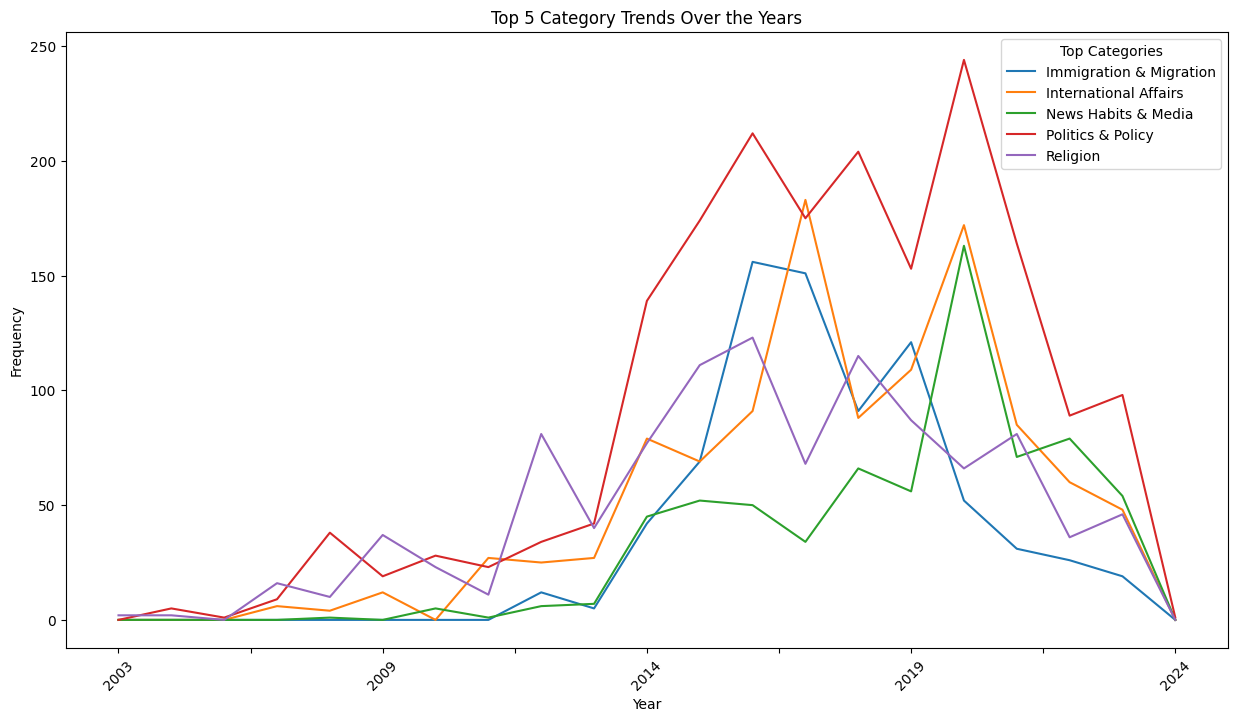

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# Function to categorize content based on keywords
def categorize_text(text, category_keywords):
    text_lower = text.lower()
    for category, keywords in category_keywords.items():
        if any(keyword in text_lower for keyword in keywords):
            return category
    return "Uncategorized"

# NLTK setup for tokenization and stop words
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

years = []
combined_texts = []
categories = []

for content in contents:
    date_str = content.split(" ")[2]
    # print(date_str)
    # year = str(parse(date_str, fuzzy=True).year)
    years.append(date_str)

    tokens = word_tokenize(content)
    filtered_text = " ".join([word for word in tokens if word.lower() not in stop_words and word.isalpha()])
    combined_texts.append(filtered_text)

    category = categorize_text(filtered_text, category_keywords)
    categories.append(category)

# Create DataFrame
df = pd.DataFrame({'Year': years, 'Category': categories})

# Exclude 'Uncategorized' and Determine Top 5 Categories
df_filtered = df[df['Category'] != 'Uncategorized']
top_categories = df_filtered['Category'].value_counts().head(5).index.tolist()

# Filter DataFrame for Top 5 Categories
filtered_df = df[df['Category'].isin(top_categories)]
category_count_over_years = filtered_df.groupby(['Year', 'Category']).size().reset_index(name='Count')

# Pivot for plotting
pivot_df = category_count_over_years.pivot(index='Year', columns='Category', values='Count').fillna(0)

# Visualization
pivot_df.plot(kind='line', figsize=(15, 8))
plt.title('Top 5 Category Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Top Categories')
plt.show()



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


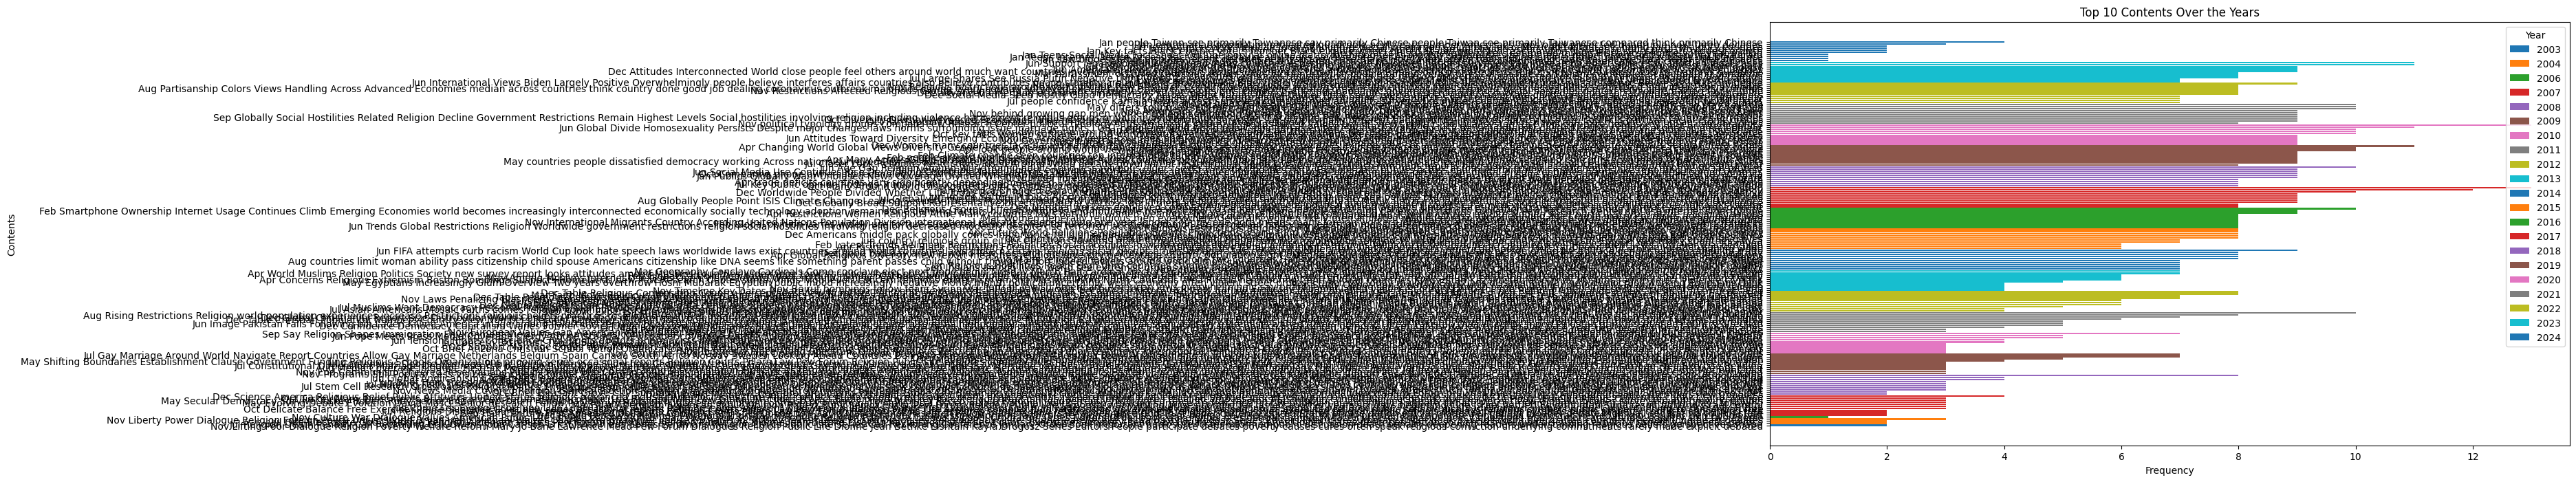

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from dateutil.parser import parse
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# NLTK setup for tokenization and stop words
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

years = []
cleaned_texts = []

for content in contents:
    # Extracting year
    date_str = content.split(" ")[2]
    year = parse(date_str, fuzzy=True).year
    years.append(year)

    # Tokenize and remove stop words
    tokens = word_tokenize(content)
    filtered_text = " ".join([word for word in tokens if word.lower() not in stop_words and word.isalpha()])
    cleaned_texts.append(filtered_text)

# Mapping contents to years and counting frequencies
content_year_map = list(zip(years, cleaned_texts))
year_content_freq = {}
for year in set(years):
    contents_in_year = [content for y, content in content_year_map if y == year]
    content_counts = Counter(contents_in_year)
    year_content_freq[year] = content_counts.most_common(10)

# Preparing data for DataFrame
plot_data = []
for year, top_contents in year_content_freq.items():
    for content, count in top_contents:
        plot_data.append({'Year': year, 'Content': content, 'Frequency': count})

df_plot = pd.DataFrame(plot_data)

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

for year in set(years):
    df_year = df_plot[df_plot['Year'] == year]
    df_year = df_year.sort_values(by='Frequency', ascending=True)
    ax.barh(df_year['Content'], df_year['Frequency'], label=year)

plt.xlabel('Frequency')
plt.ylabel('Contents')
plt.title('Top 10 Contents Over the Years')
plt.legend(title='Year')
plt.show()



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


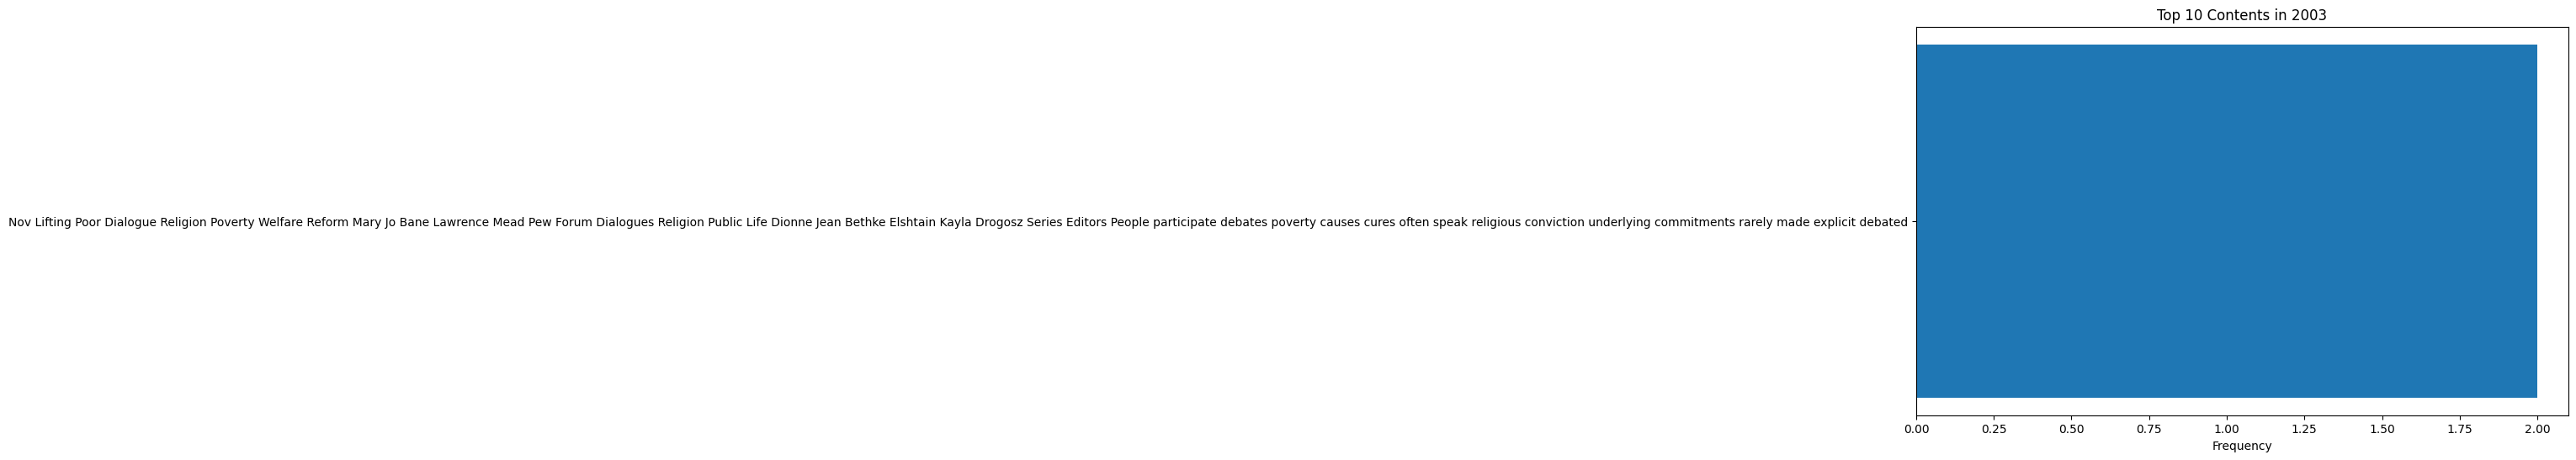

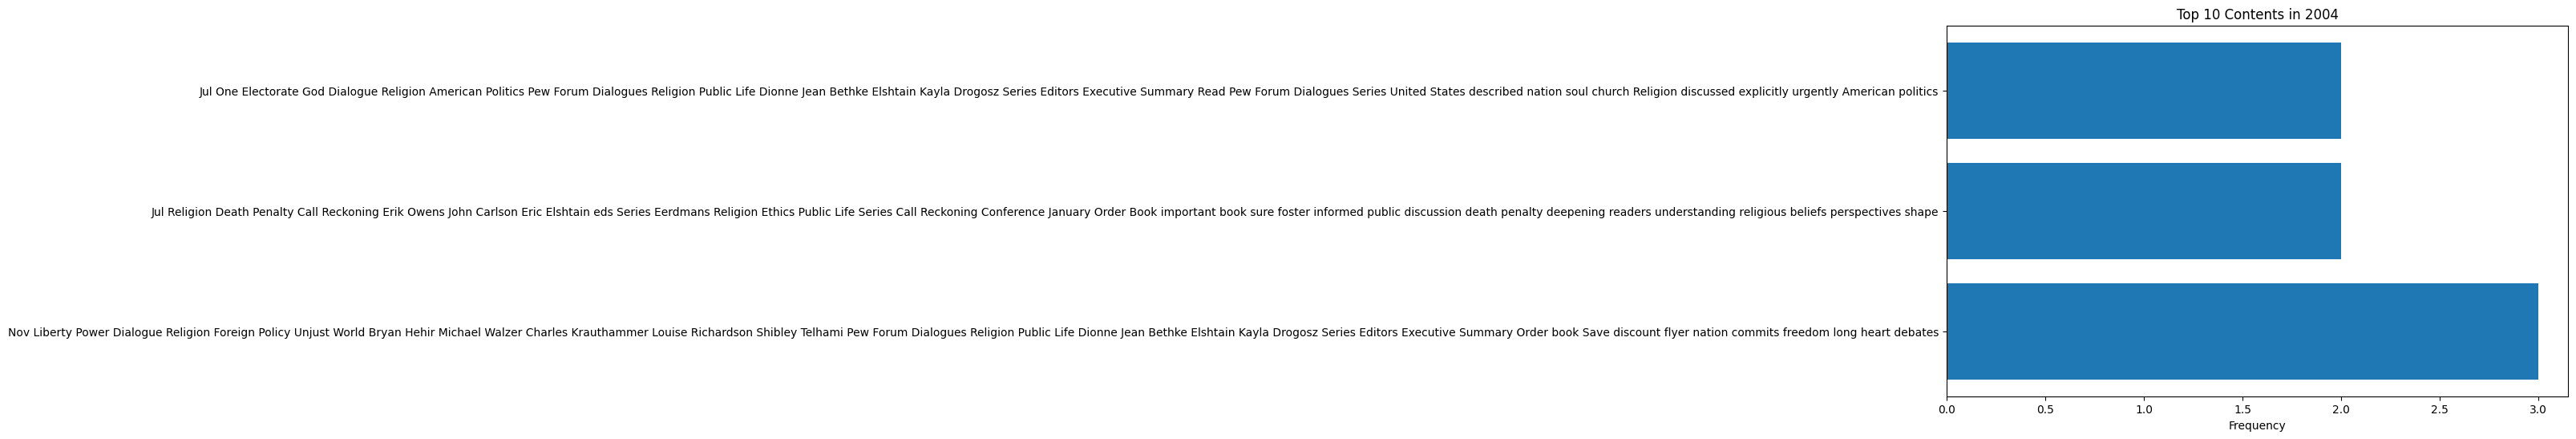

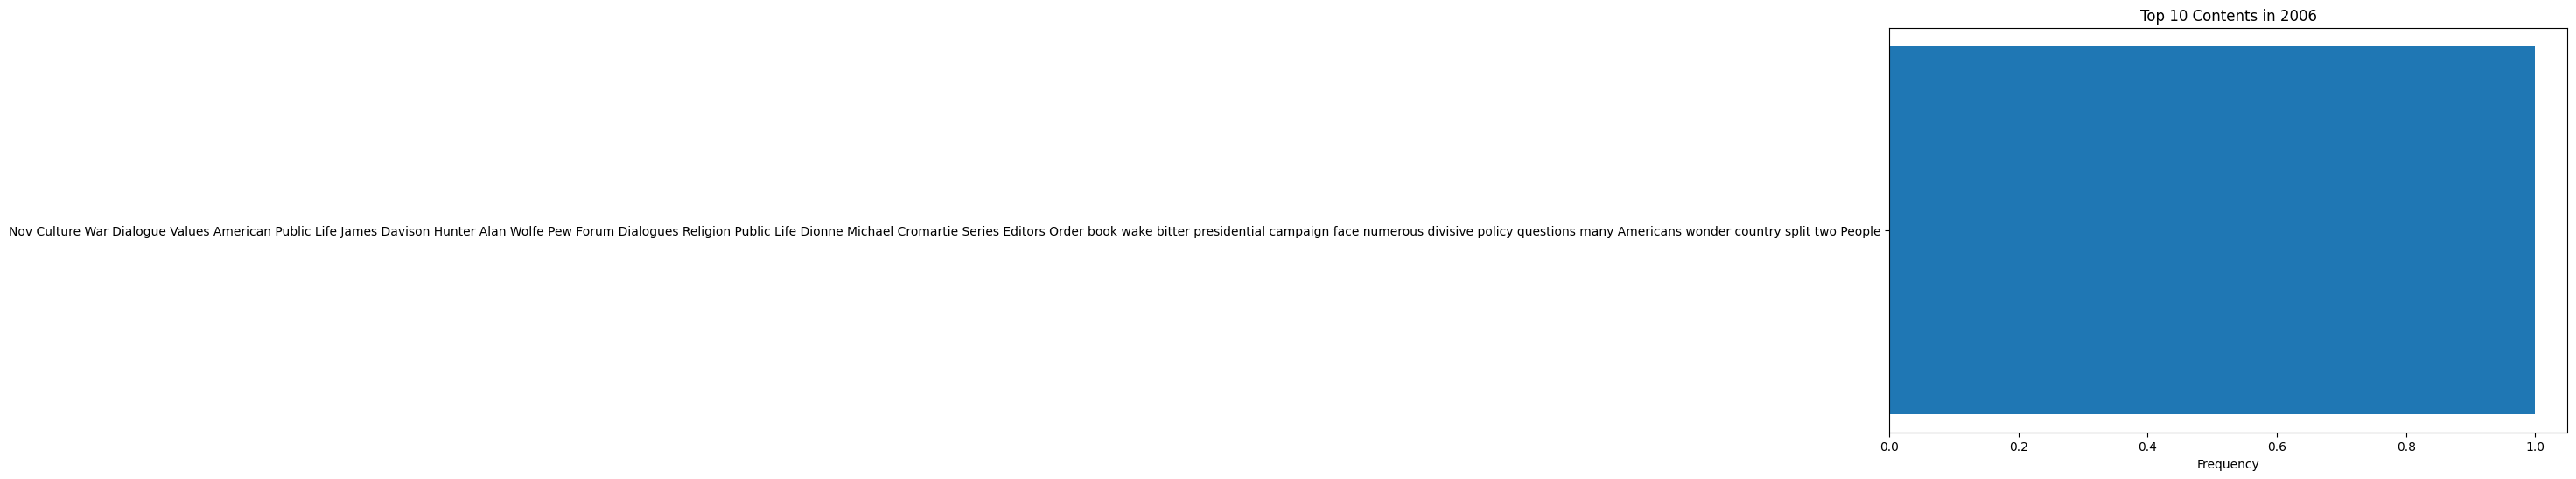

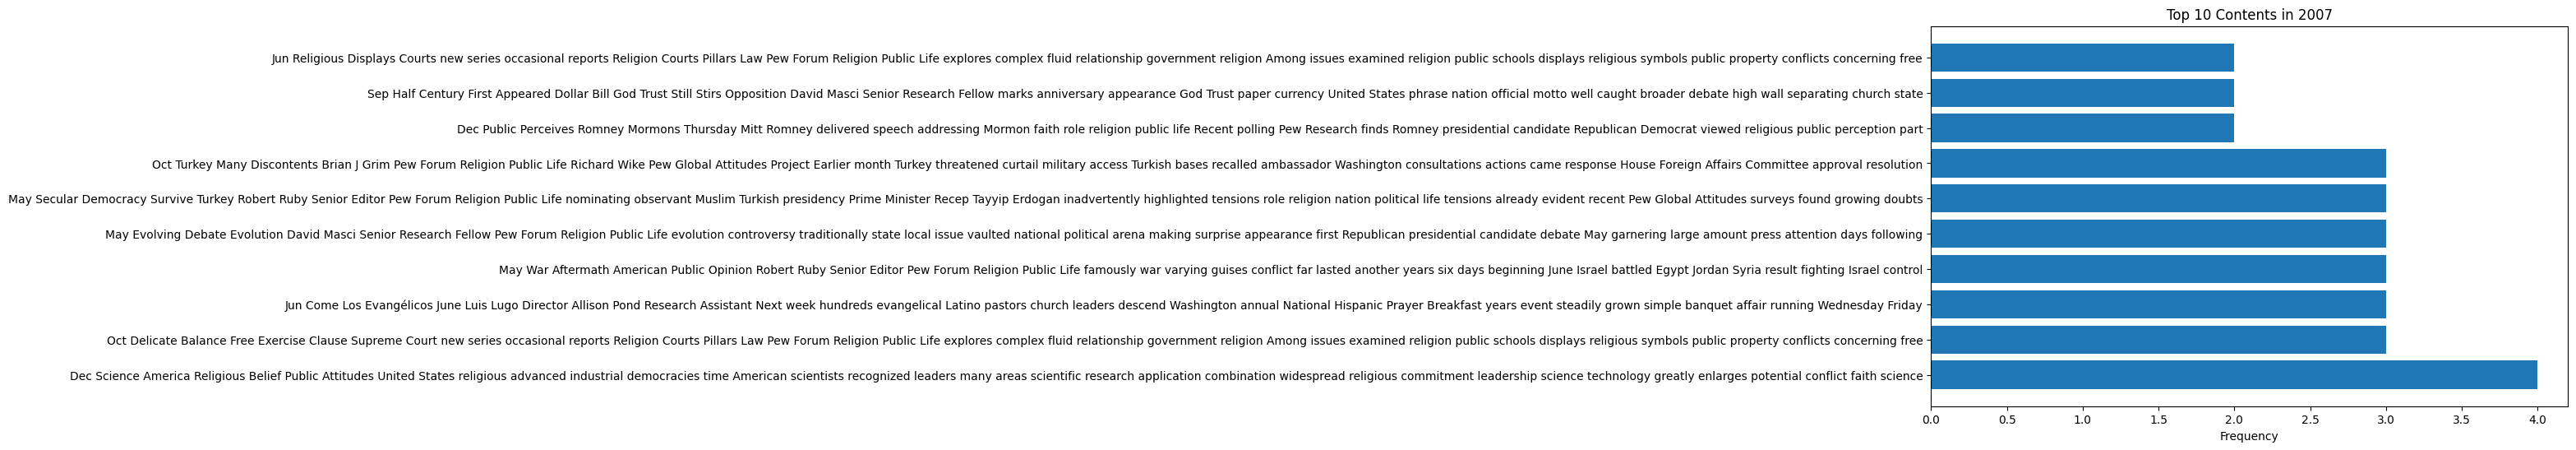

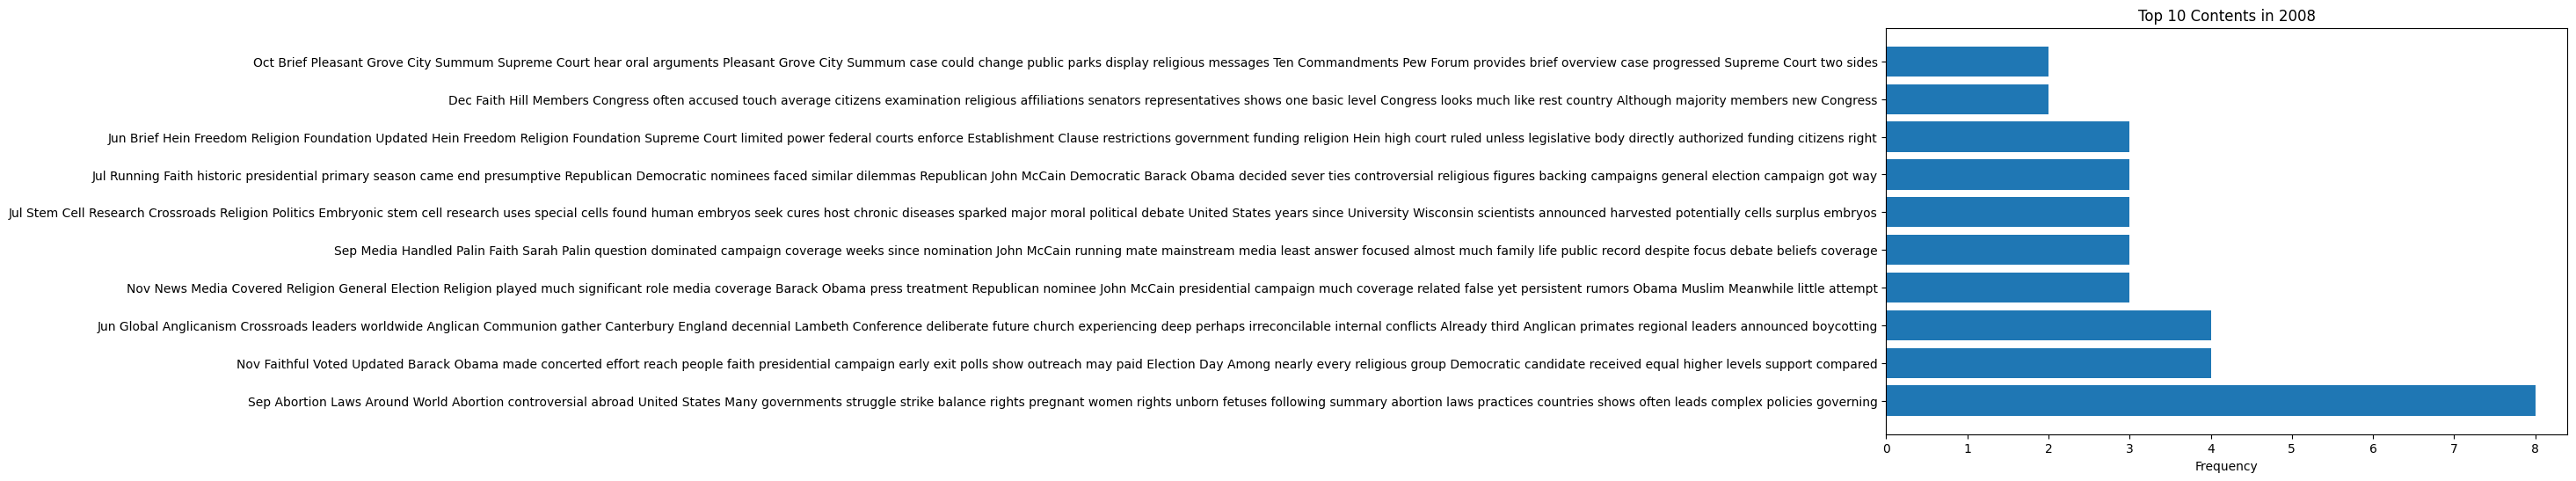

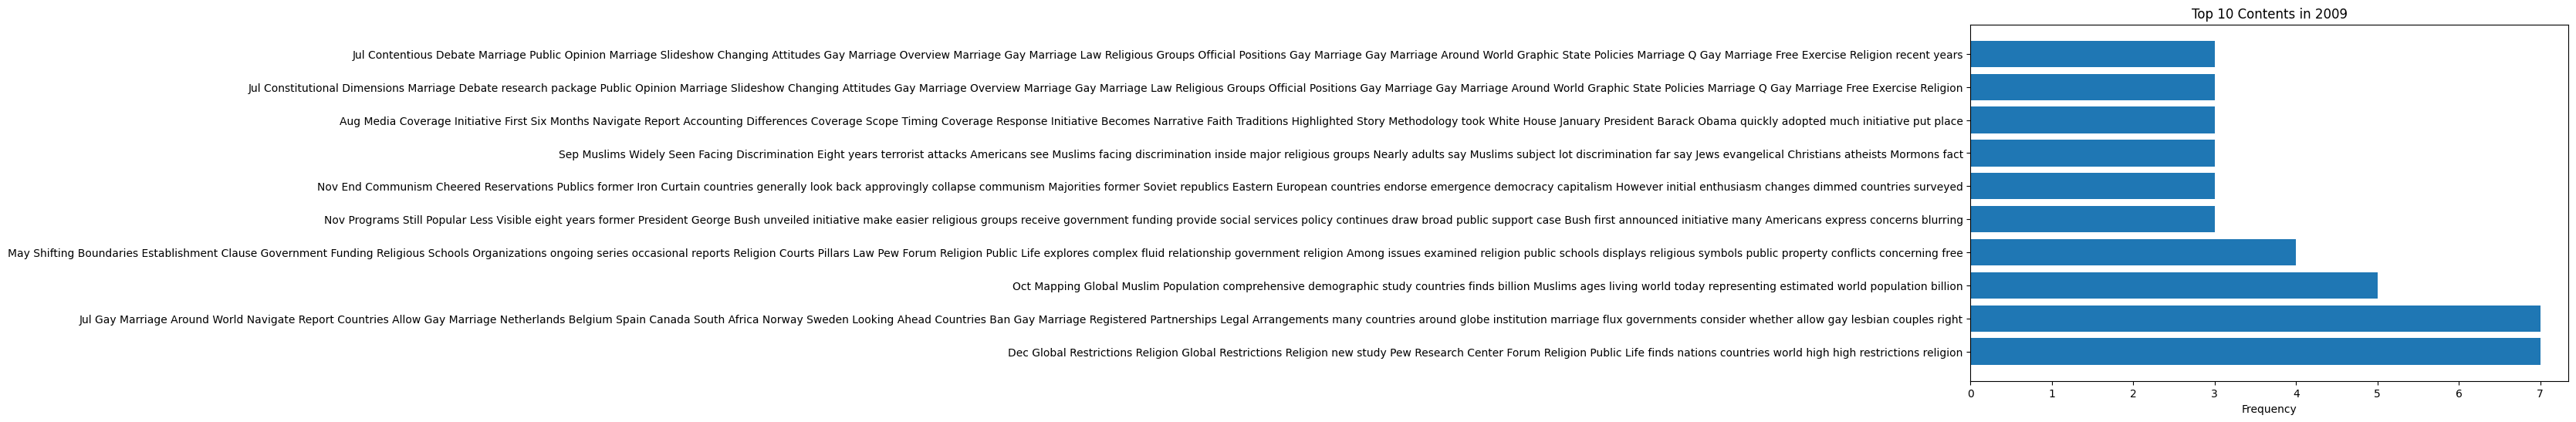

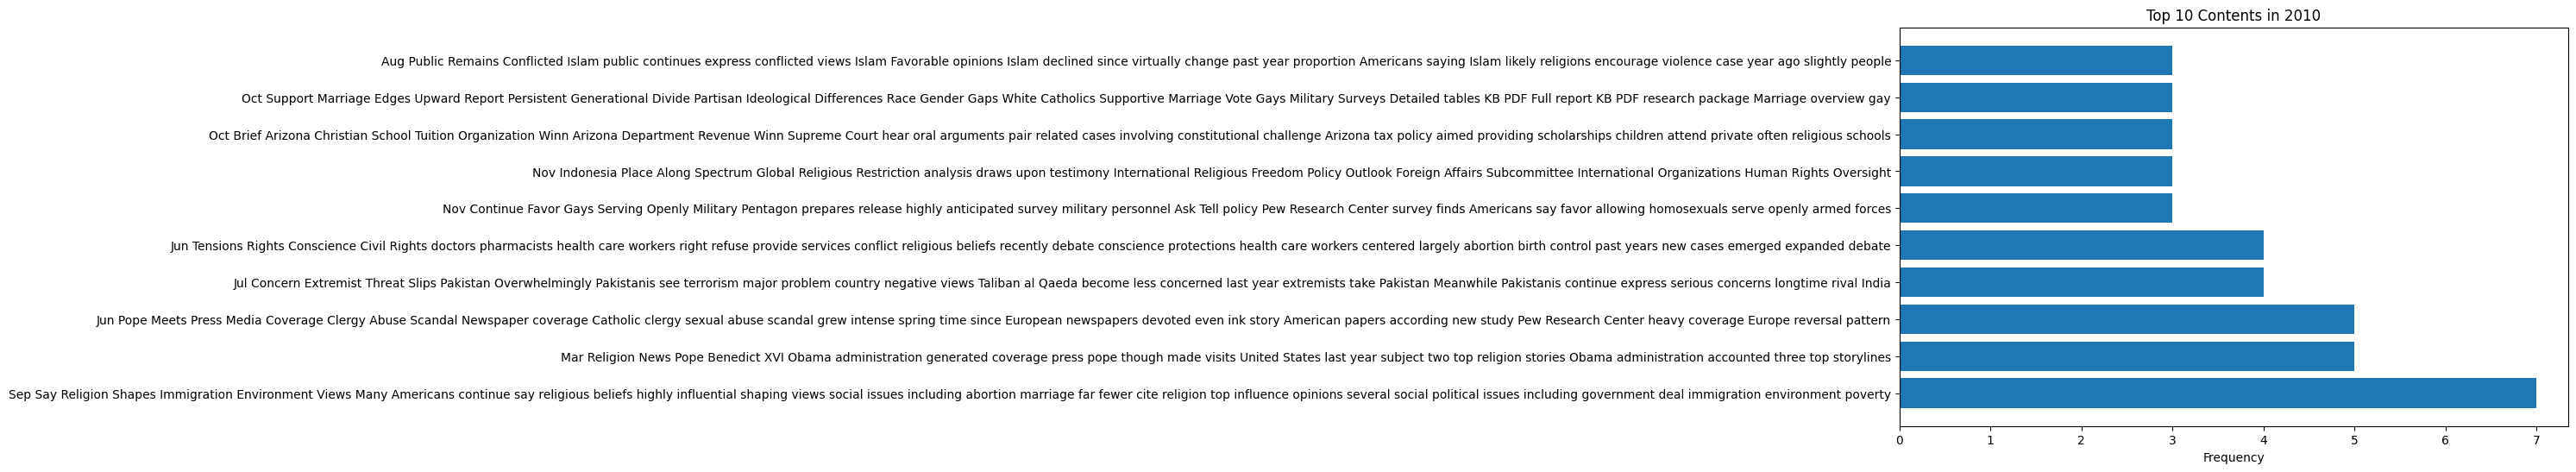

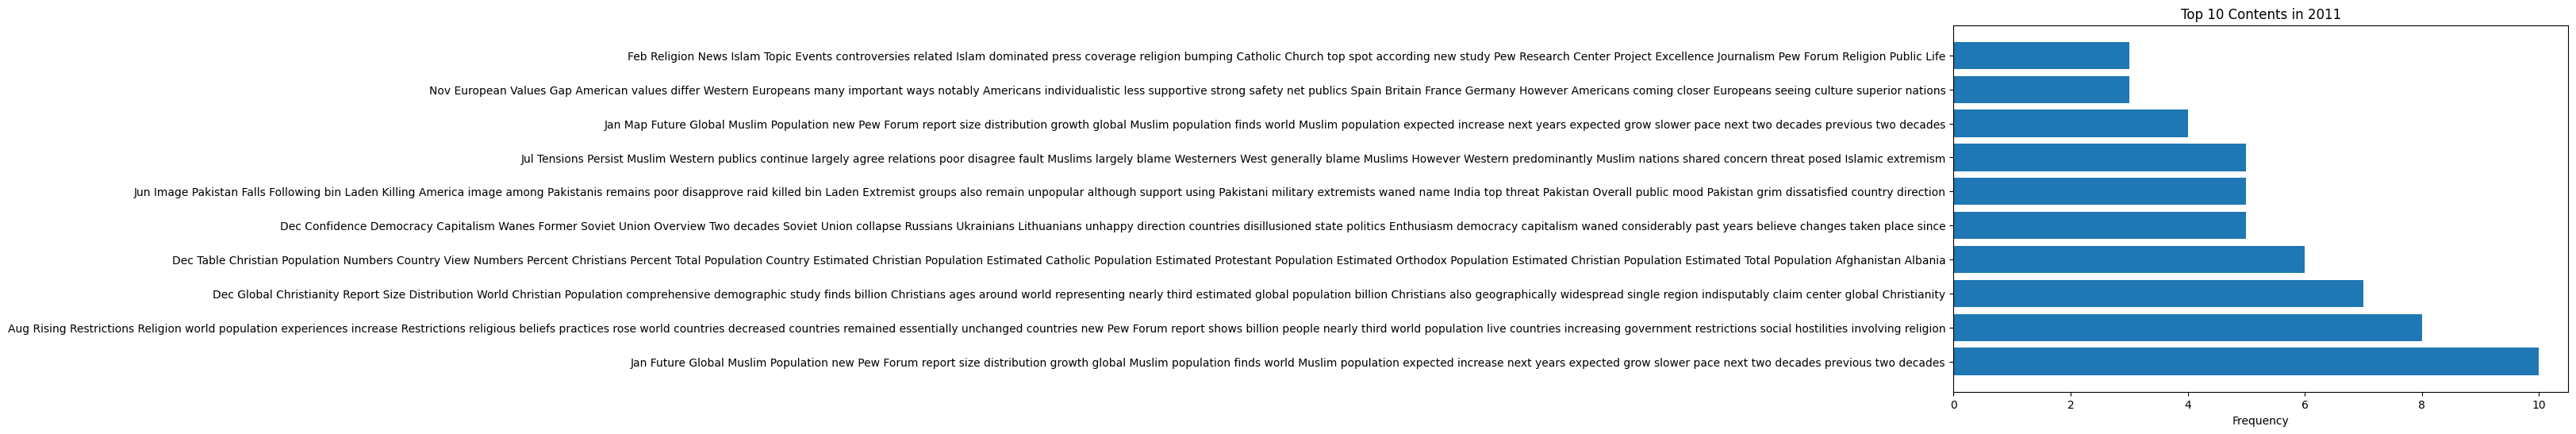

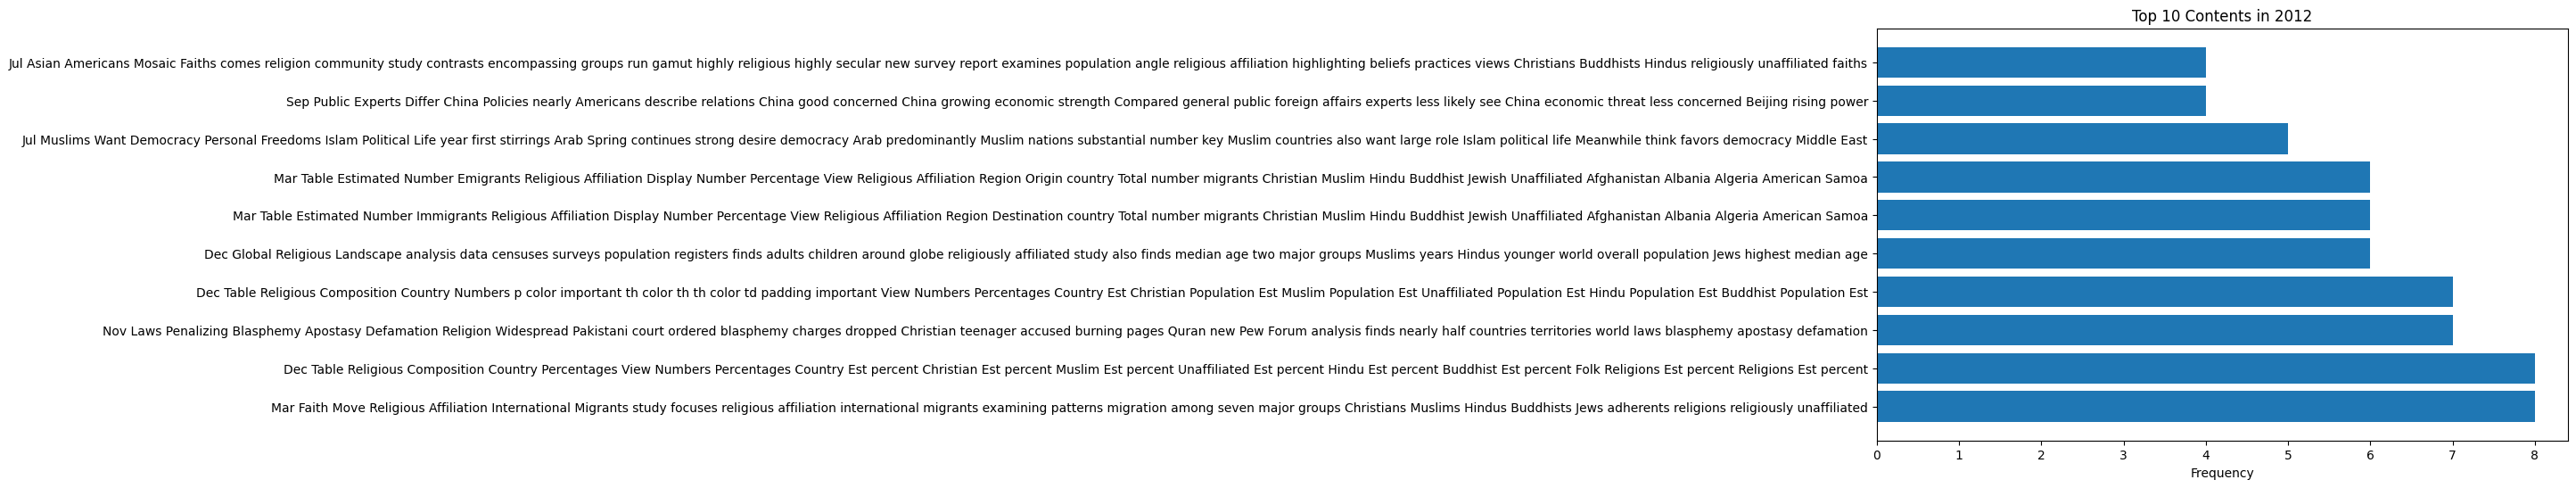

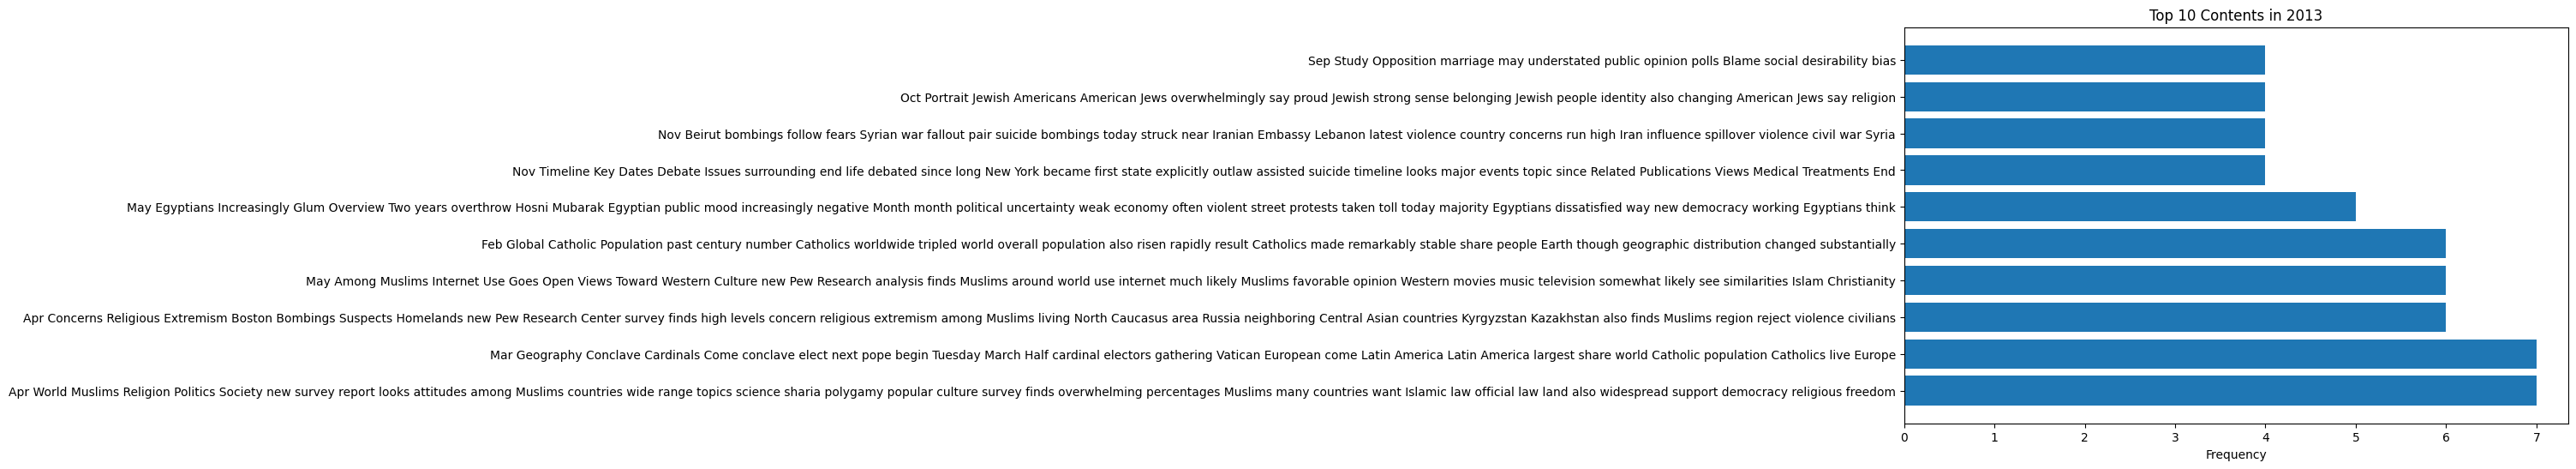

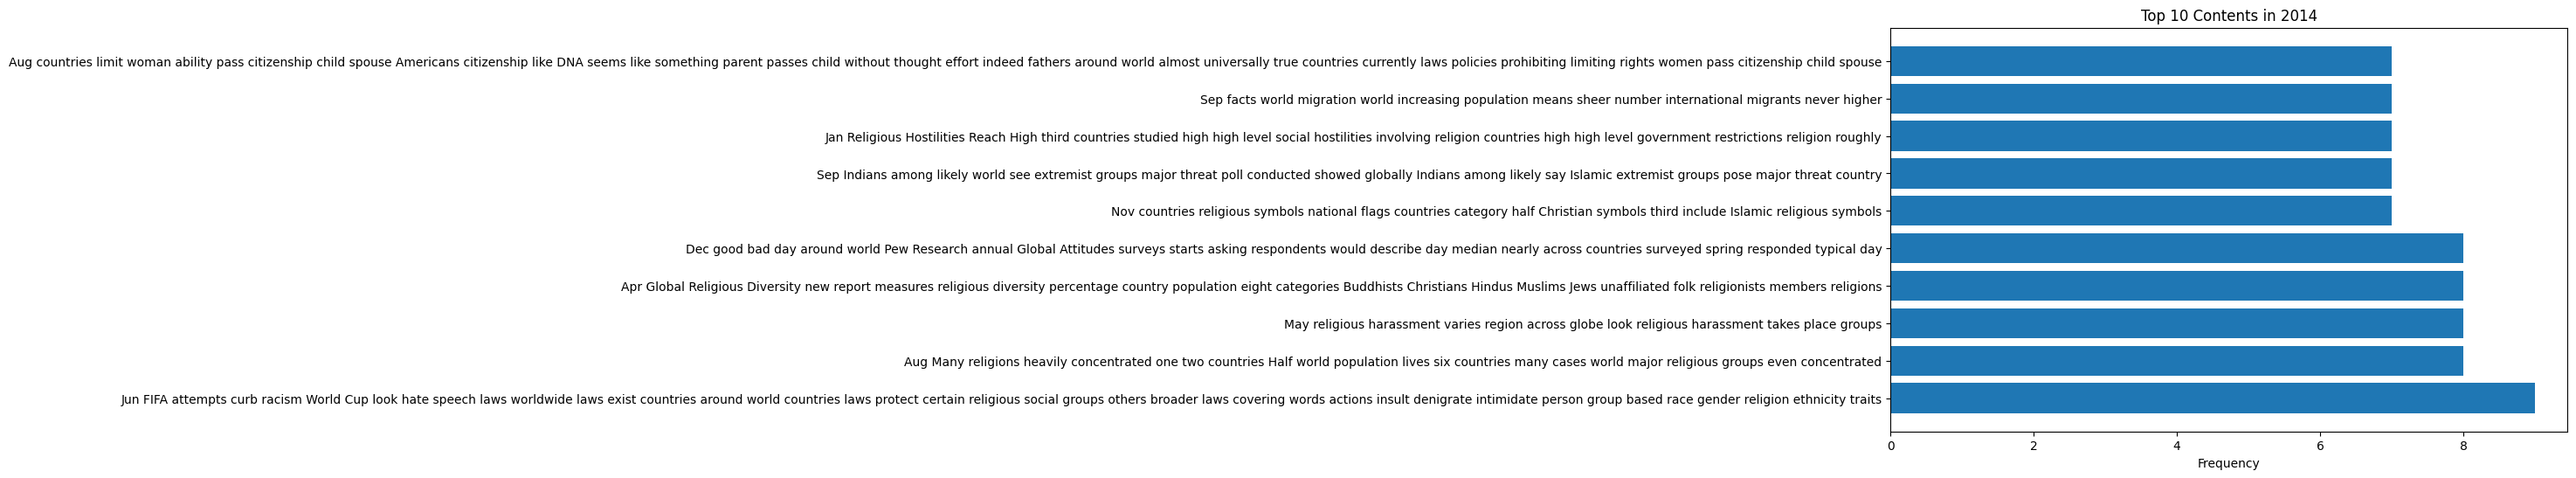

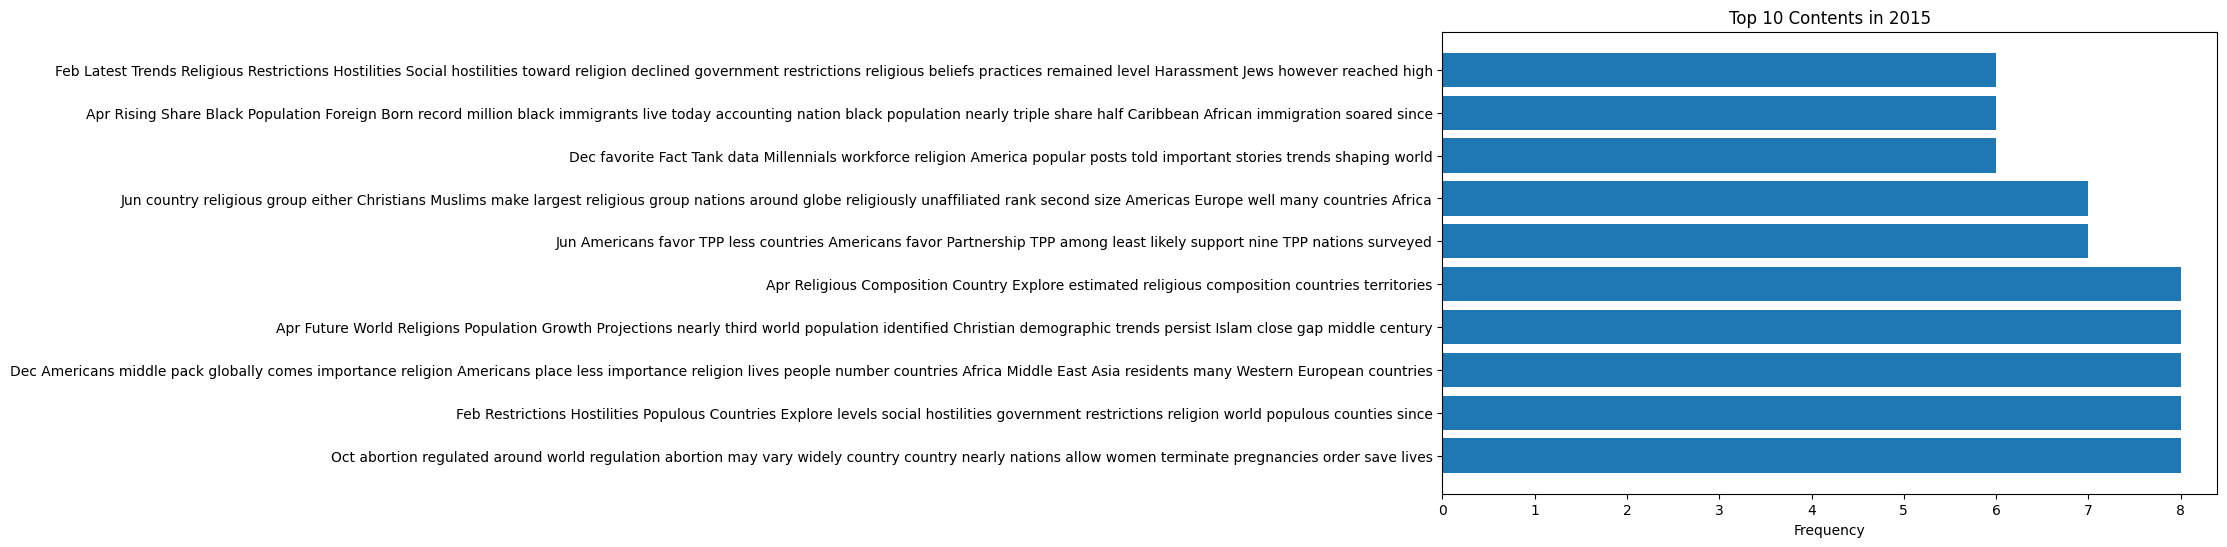

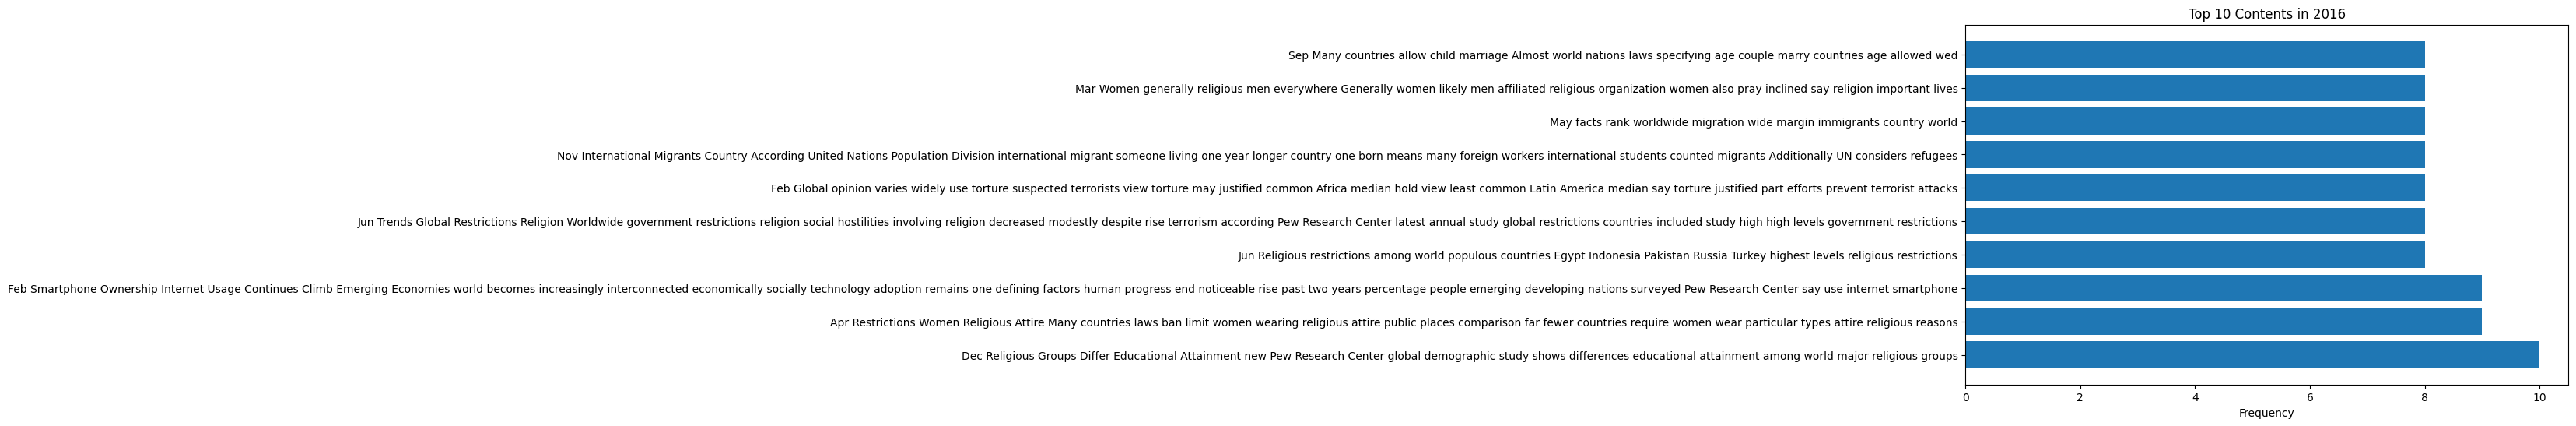

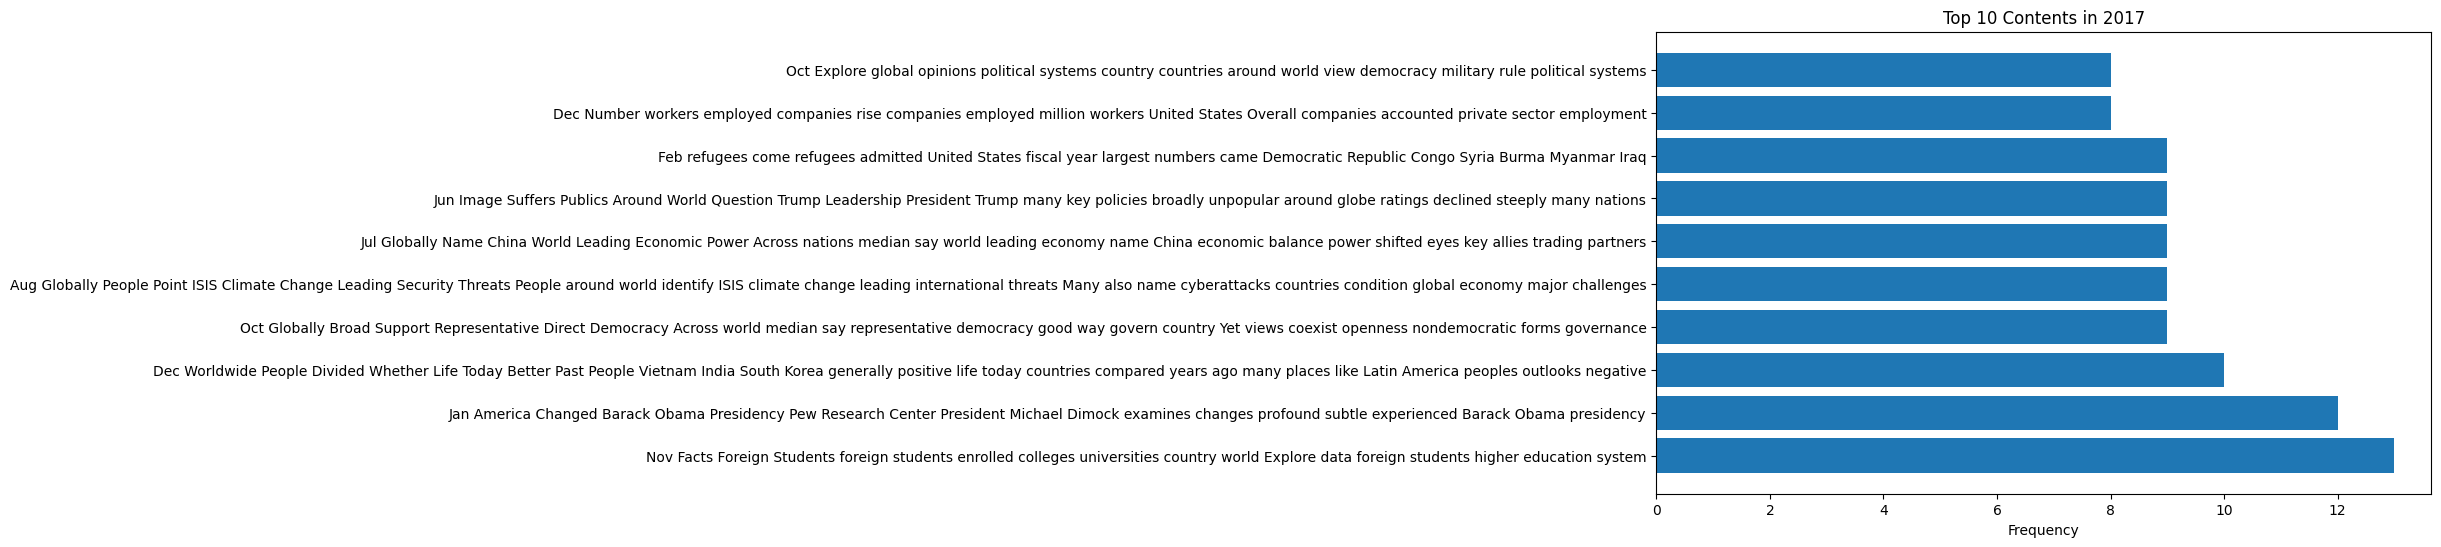

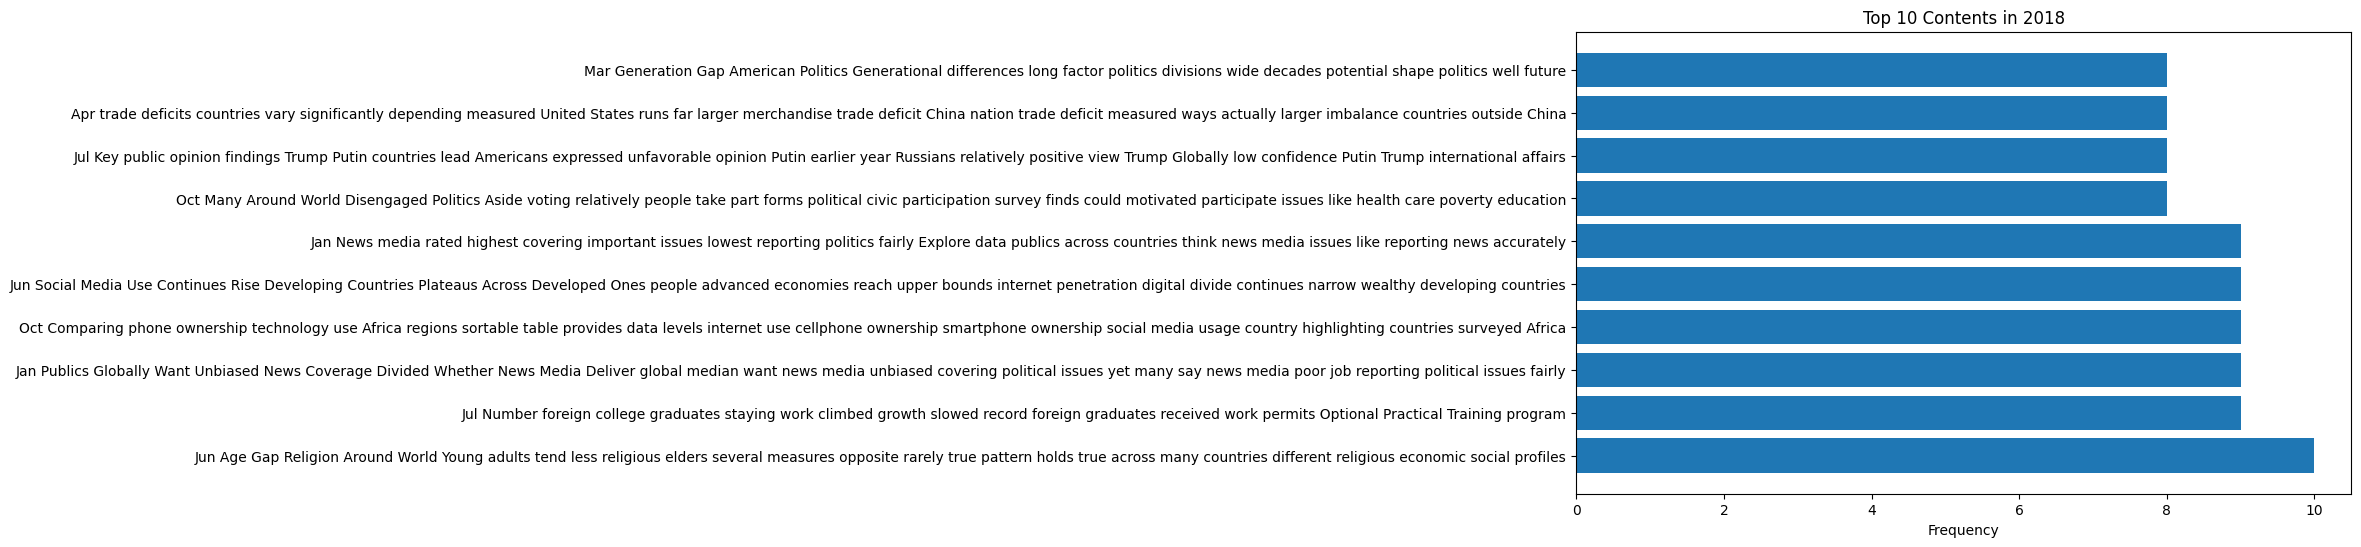

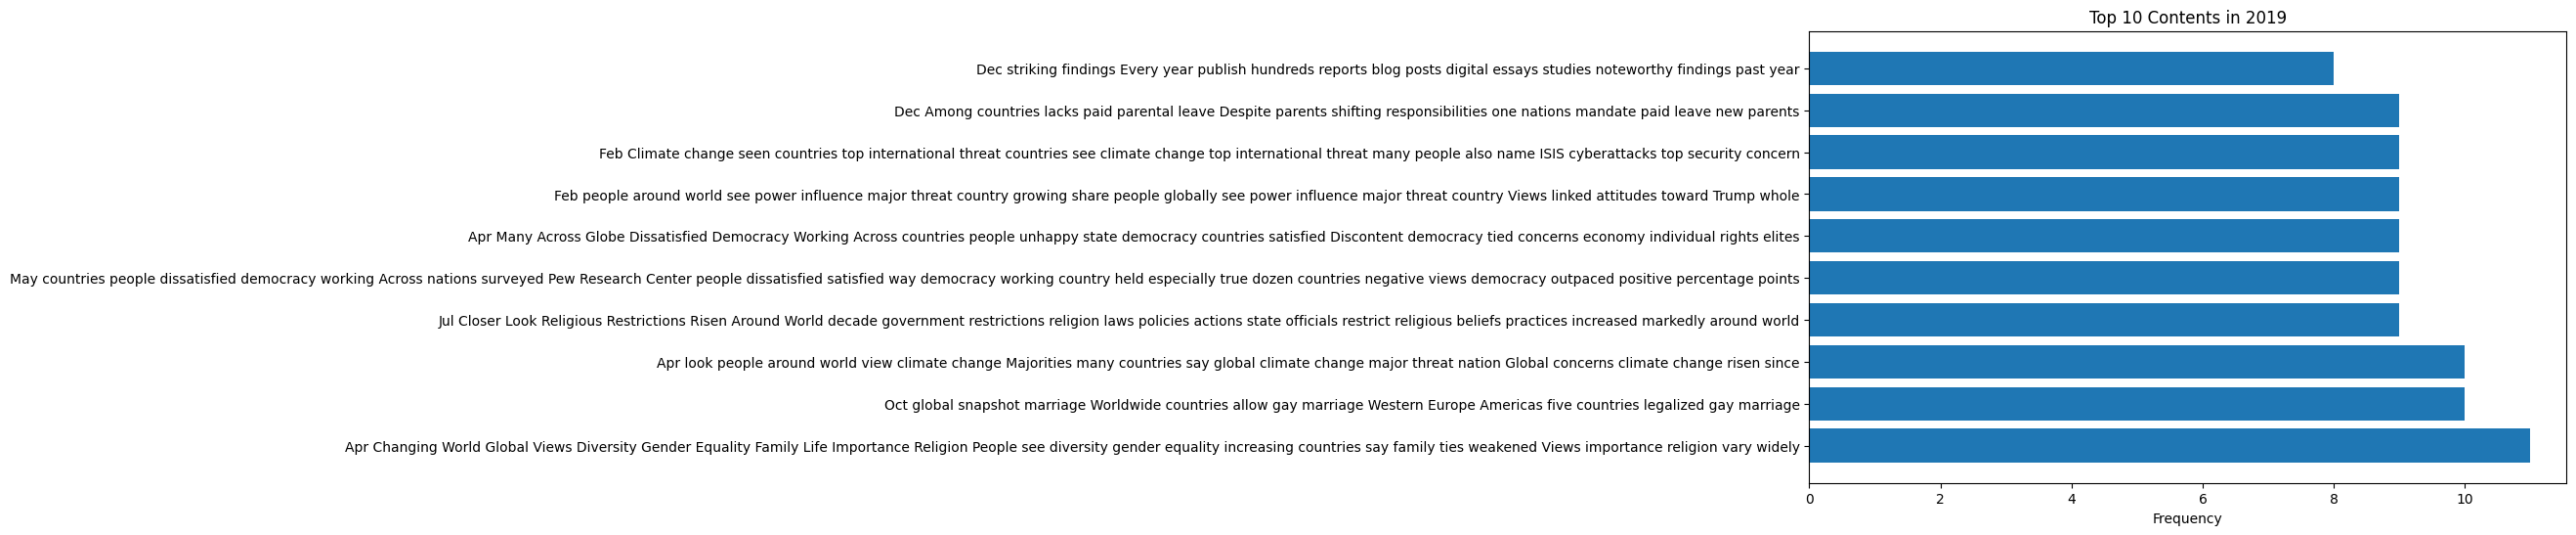

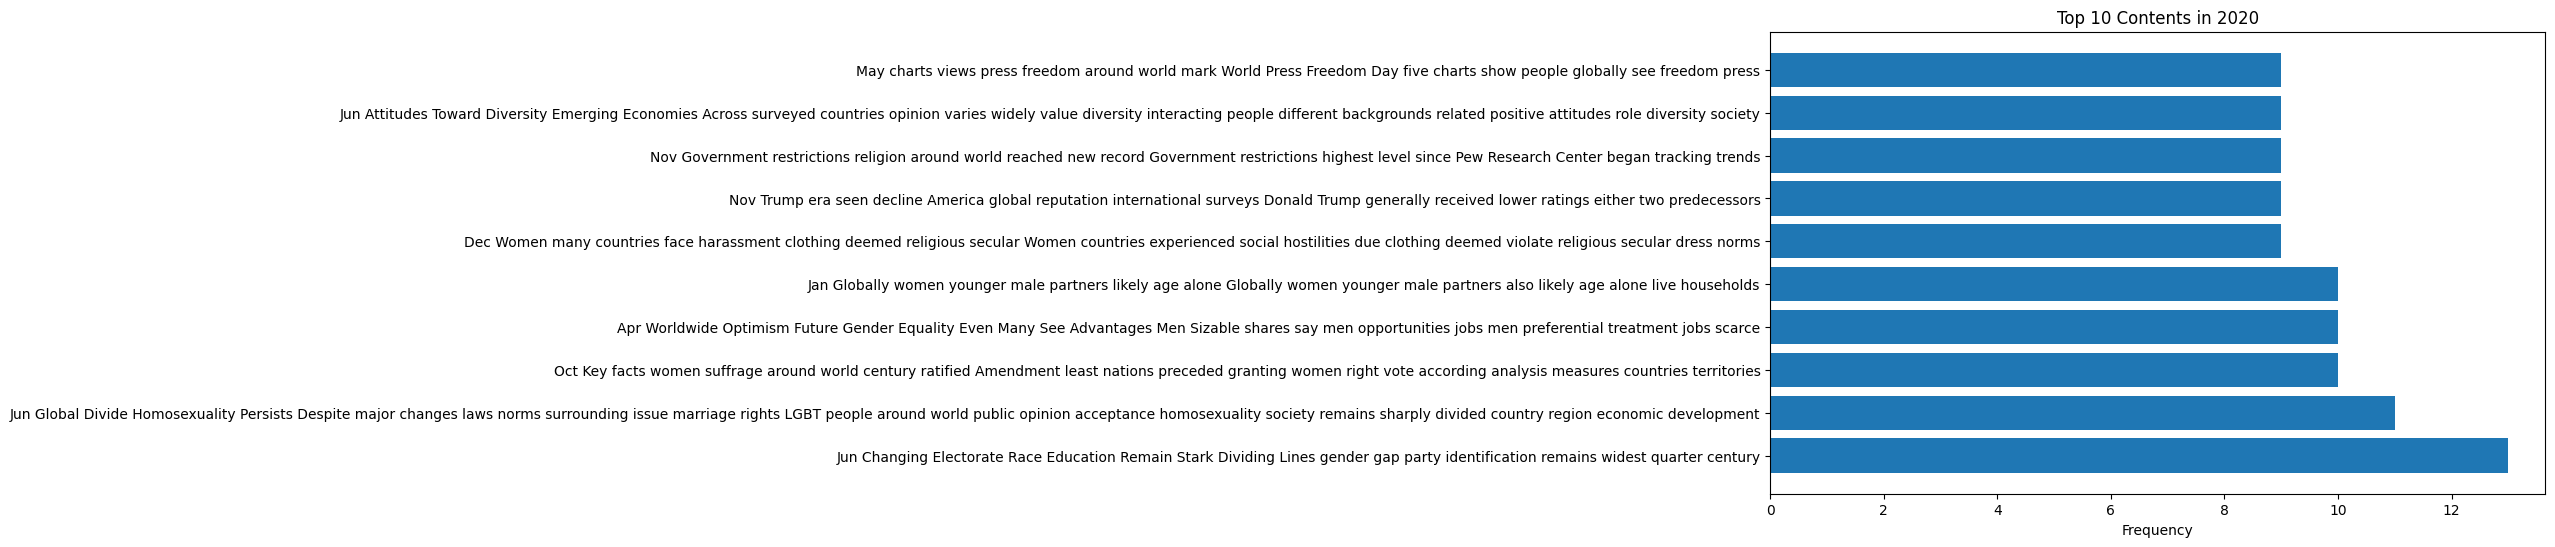

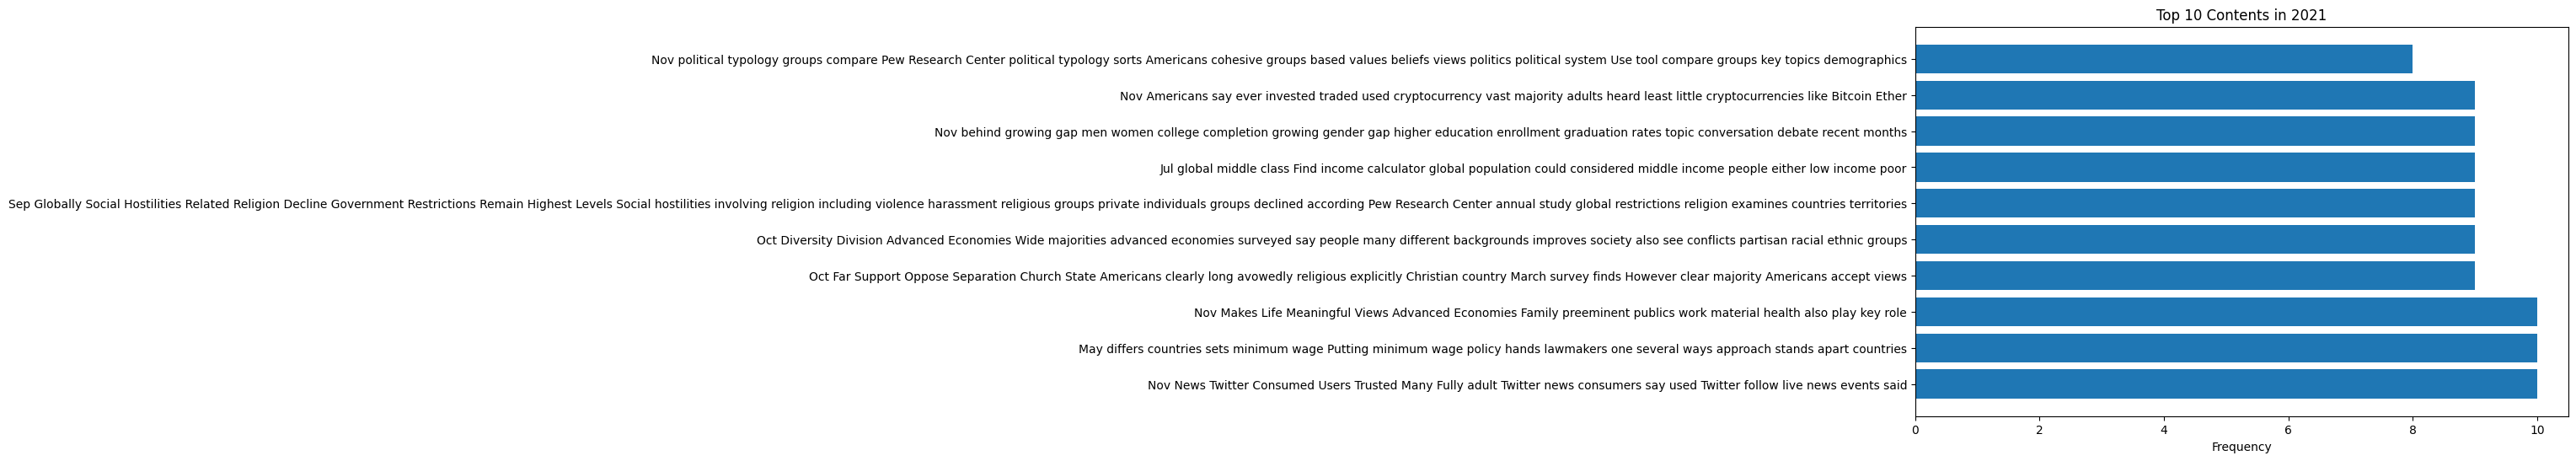

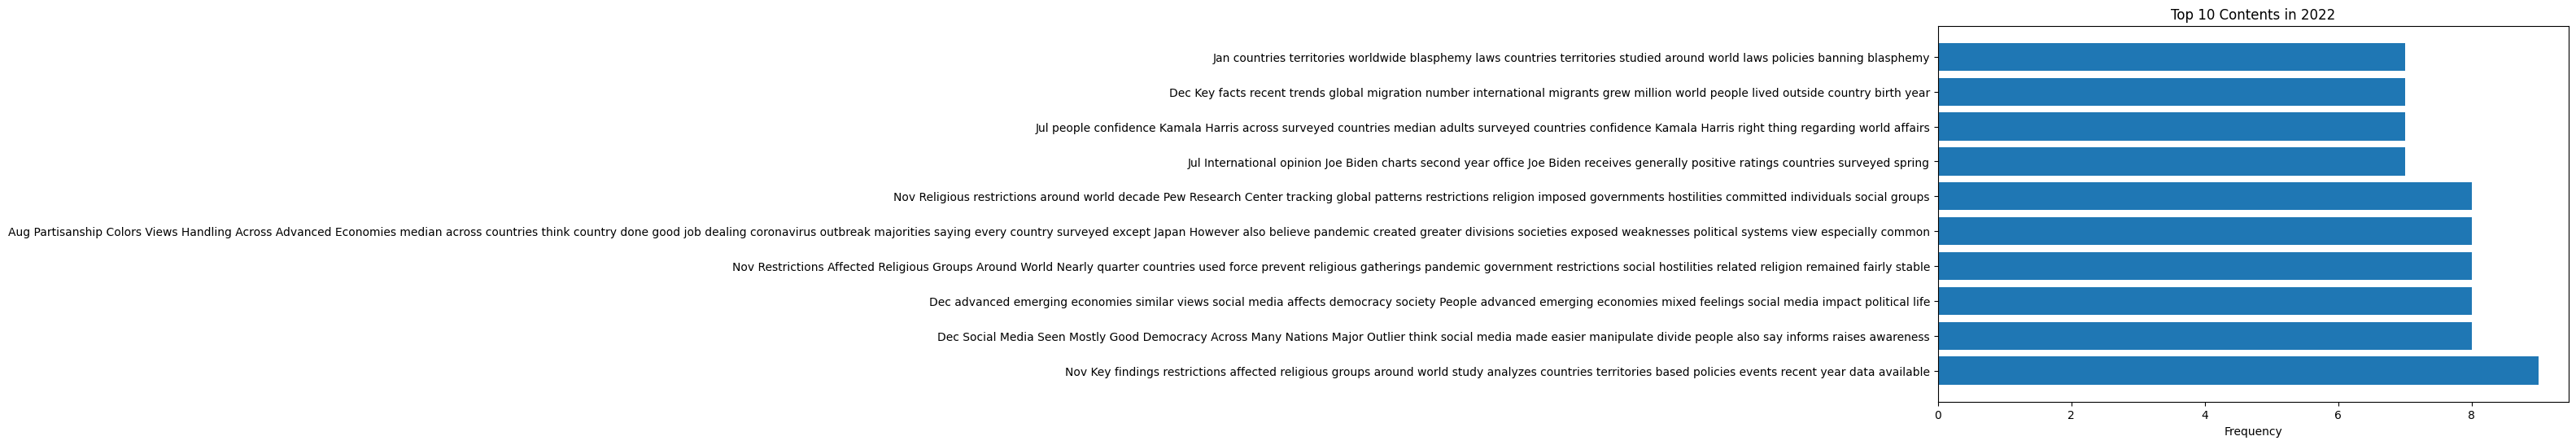

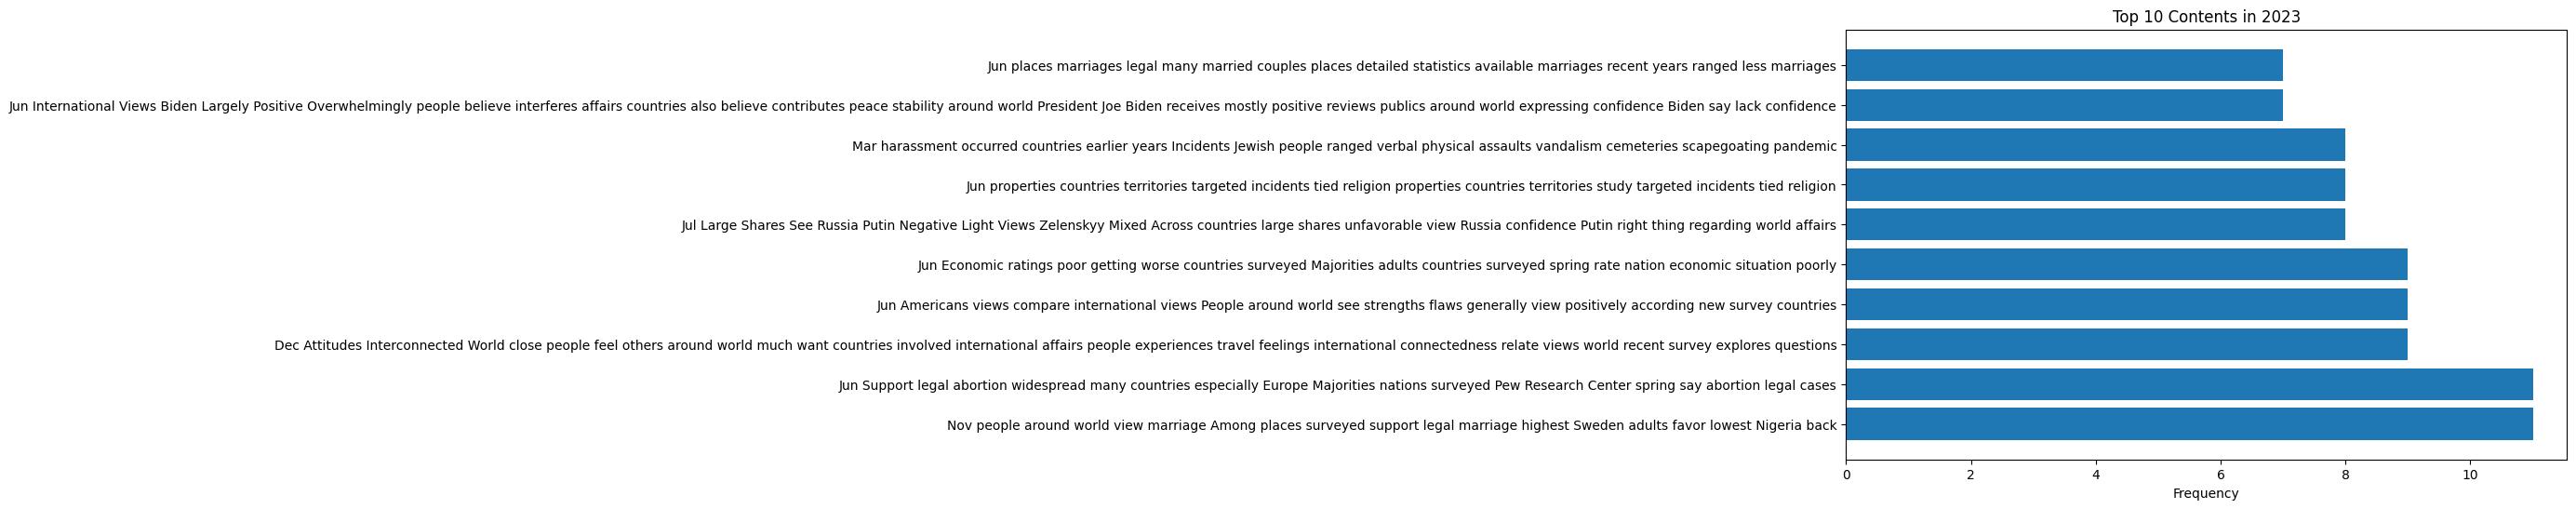

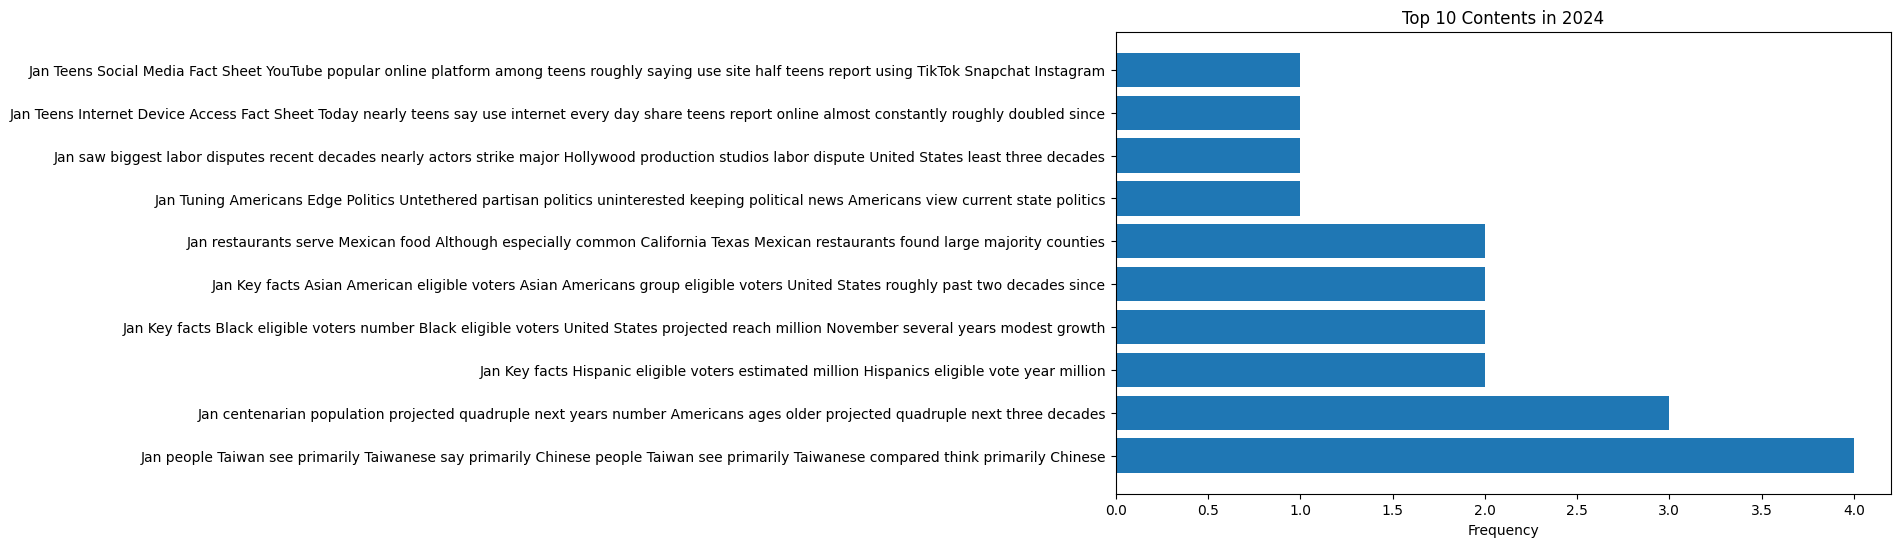

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from dateutil.parser import parse
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# NLTK setup for tokenization and stop words
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

years = []
cleaned_texts = []

for content in contents:
    # Extracting year
    date_str = content.split(" ")[2]
    year = parse(date_str, fuzzy=True).year
    years.append(year)

    # Tokenize and remove stop words
    tokens = word_tokenize(content)
    filtered_text = " ".join([word for word in tokens if word.lower() not in stop_words and word.isalpha()])
    cleaned_texts.append(filtered_text)

# Mapping contents to years and counting frequencies
content_year_map = list(zip(years, cleaned_texts))
year_content_freq = {}
for year in set(years):
    contents_in_year = [content for y, content in content_year_map if y == year]
    content_counts = Counter(contents_in_year)
    year_content_freq[year] = content_counts.most_common(10)

# Create individual plots for each year
for year in sorted(set(years)):
    top_contents = year_content_freq[year]
    contents, counts = zip(*top_contents)

    plt.figure(figsize=(10, 6))
    plt.barh(contents, counts)
    plt.xlabel('Frequency')
    plt.title(f'Top 10 Contents in {year}')
    plt.show()


/usr/local/lib/python3.10/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.6.0) was trained with spaCy v3.6.0 and may not be 100% compatible with the current version (3.7.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


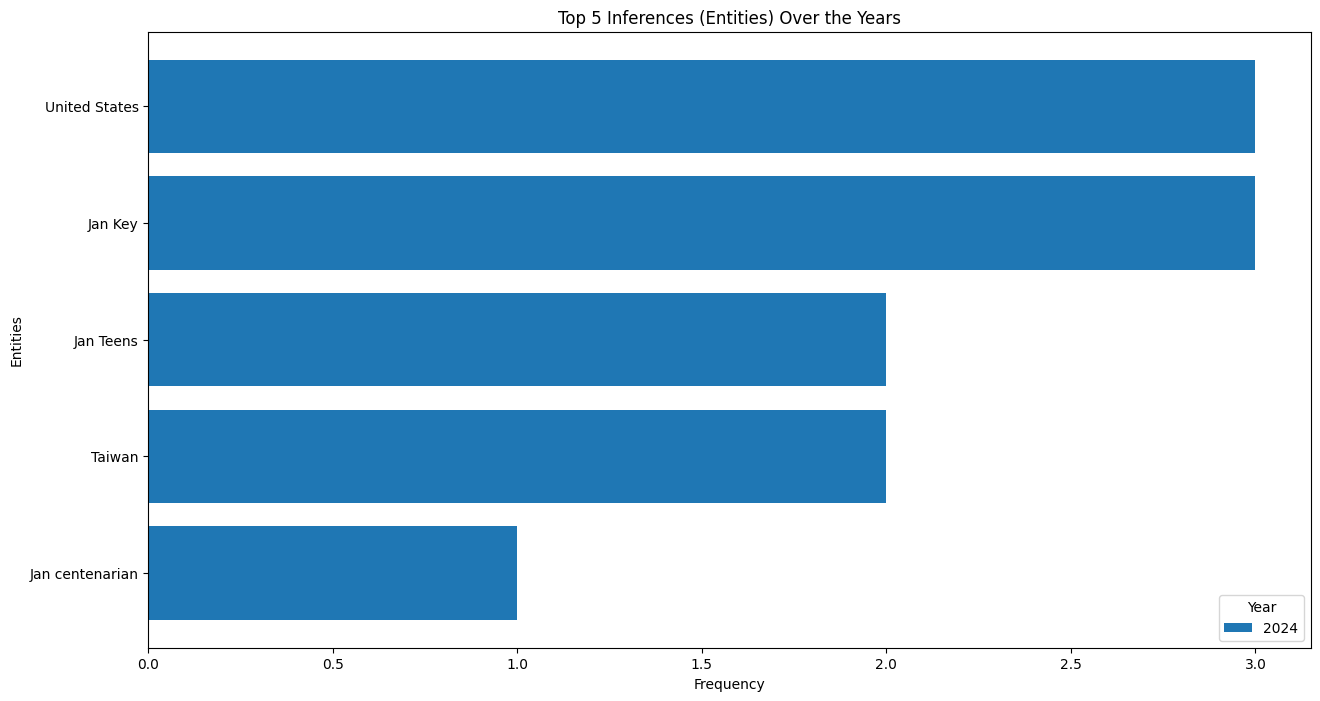

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from dateutil.parser import parse
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

# Load spaCy model
nlp = spacy.load("en_core_web_sm")


# Process contents
years = []
entities = []

for content in contents:
    # Extracting year
    date_str = content.split(" ")[2]
    # year = parse(date_str, fuzzy=True).year
    years.append(year)

    # Extract entities using spaCy
    doc = nlp(content)
    entities.extend([(year, ent.text) for ent in doc.ents if ent.label_ in ['ORG', 'PERSON', 'GPE'] and ent.text.lower() not in STOP_WORDS])

# Count entity frequencies per year and get top 5
entity_year_freq = {}
for year in set(years):
    year_entities = [entity for y, entity in entities if y == year]
    entity_counts = Counter(year_entities)
    entity_year_freq[year] = entity_counts.most_common(5)

# Prepare data for DataFrame
plot_data = []
for year, top_entities in entity_year_freq.items():
    for entity, count in top_entities:
        plot_data.append({'Year': year, 'Entity': entity, 'Frequency': count})

df_plot = pd.DataFrame(plot_data)

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))
for year in sorted(set(years)):
    df_year = df_plot[df_plot['Year'] == year]
    df_year = df_year.sort_values(by='Frequency', ascending=True)
    ax.barh(df_year['Entity'], df_year['Frequency'], label=year)

plt.xlabel('Frequency')
plt.ylabel('Entities')
plt.title('Top 5 Inferences (Entities) Over the Years')
plt.legend(title='Year')
plt.show()
